  # JOINING DATA
  (Join the data from Part 1 with the data from Part 2 to create a new dataframe.)

The process flow is as follows:
  1. Import library required 
  2. Load each dataframe saved from Part 1 and 2
  3. Join the loaded dataframes
  4. Do quick EDA
  5. Use data Visualization to explore data
  6. Create SQLite database and store the data collected on the POIs

In [123]:
# Importing the required libraries 

import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
import seaborn
seaborn.set()
import warnings
warnings.filterwarnings("ignore")

##### LOAD DATAFRAMES 

In [2]:
# Load Citybike dataframe
data_cb = pd.read_csv(r'C:\Code\Project_Stat_Model_DataFrame_Store\city_bike_df.csv')
data_cb.head()

,Station Name,Latitude,Longitude,Total Bikes
0,PARVIS ROTTERDAM,50.637709,3.077478,20
1,ROMARIN,50.645430,3.075116,27
2,RUE CHAMBORD,50.629720,3.133873,0
3,MAIRIE DE QUARTIER OUEST,50.687500,3.158559,12
4,FAUBOURG D'ARRAS,50.614052,3.062195,16


In [3]:
# Create a new column concatenating latitude and longitude into a comma-separated string
data_cb['ll'] = data_cb['Latitude'].astype(str) + ',' + data_cb['Longitude'].astype(str)
data_cb.head(7) # View the dataframe with the new column 'll' added.

,Station Name,Latitude,Longitude,Total Bikes,ll
0,PARVIS ROTTERDAM,50.637709,3.077478,20,"50.637709,3.077478"
1,ROMARIN,50.645430,3.075116,27,"50.64543,3.075116"
2,RUE CHAMBORD,50.629720,3.133873,0,"50.62972,3.133873"
3,MAIRIE DE QUARTIER OUEST,50.687500,3.158559,12,"50.6875,3.1585592"
4,FAUBOURG D'ARRAS,50.614052,3.062195,16,"50.614052,3.062195"
5,LECLERC,50.628990,3.043307,27,"50.62899,3.043307"
6,BUISSON,50.656487,3.088004,16,"50.656487,3.088004"


In [4]:
# Dropping irrelevant columns or create a new dataframe to include relevant columns

# Create a new dataframe with relevant columns
# data_cb_x = data_cb[['Station Name', 'Latitude', 'Longitude', 'Total Bikes', 'll']]

# data_cb_x

In [5]:
data_cb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Station Name  289 non-null    object 
 1   Latitude      289 non-null    float64
 2   Longitude     289 non-null    float64
 3   Total Bikes   289 non-null    int64  
 4   ll            289 non-null    object 
dtypes: float64(2), int64(1), object(2)
memory usage: 11.4+ KB


In [6]:
# Save the DataFrame as a CSV file
data_cb.to_csv(r'C:\Code\Project_Stat_Model_DataFrame_Store\cb1_df.csv', index=False)

In [7]:
# Load foursquare dataframe
 
data_fsq = pd.read_csv(r'C:\Code\Project_Stat_Model_DataFrame_Store\fsq2_df.csv') 
data_fsq.head()

,Foursquare ID,Categories,Distance,Store Latitude,Store Longitude,Address,Country,Locality,Station_names
0,4c2c75f457a9c9b64c6af767,"Restaurant, Garden, Hotel",594,50.643400,3.074834,rue du Ballon,FR,Lille,PARVIS ROTTERDAM
1,52580520498e7287e120ec20,"Café, Coffee Shop, Restaurant",817,50.633326,3.068203,151 rue de Paris,FR,Lille,PARVIS ROTTERDAM
2,5aec3daabed483002cddc5f1,"Bar, Café, Sandwich Spot",933,50.640054,3.065019,16 bis place du Lion d'Or,FR,Lille,PARVIS ROTTERDAM
3,4bf3de1bcad2c9286f359b99,"Bar, Brewery, French Restaurant",938,50.637617,3.063970,33 place du Théâtre,FR,Lille,PARVIS ROTTERDAM
4,54bfa53d498eab9b0dc63806,French Restaurant,796,50.636692,3.065591,72- 74 rue Pierre Mauroy,FR,Lille,PARVIS ROTTERDAM


In [15]:
# Rename columns
data_fsq = data_fsq.rename(columns={"Store Latitude": "Latitude", "Store Longitude": "Longitude"})
data_fsq

,Foursquare ID,Categories,Distance,Latitude,Longitude,Address,Country,Locality,Station_names
0,4c2c75f457a9c9b64c6af767,"Restaurant, Garden, Hotel",594,50.643400,3.074834,rue du Ballon,FR,Lille,PARVIS ROTTERDAM
1,52580520498e7287e120ec20,"Café, Coffee Shop, Restaurant",817,50.633326,3.068203,151 rue de Paris,FR,Lille,PARVIS ROTTERDAM
2,5aec3daabed483002cddc5f1,"Bar, Café, Sandwich Spot",933,50.640054,3.065019,16 bis place du Lion d'Or,FR,Lille,PARVIS ROTTERDAM
3,4bf3de1bcad2c9286f359b99,"Bar, Brewery, French Restaurant",938,50.637617,3.063970,33 place du Théâtre,FR,Lille,PARVIS ROTTERDAM
4,54bfa53d498eab9b0dc63806,French Restaurant,796,50.636692,3.065591,72- 74 rue Pierre Mauroy,FR,Lille,PARVIS ROTTERDAM
...,...,...,...,...,...,...,...,...,...
2885,53a41003498e34ef9a4466ae,"Bar, Estaminet",523,50.636588,3.128251,1 place de la Liberté,FR,Villeneuve d'Ascq,CHATELLENIE
2886,5a625176f8cbd43a197a664b,"Bakery, Pastry Shop",527,50.636588,3.128251,2 rue du Général Leclerc,FR,Villeneuve d'Ascq,CHATELLENIE
2887,51496a916e0d4145625ffa31,Bakery,534,50.636747,3.128176,2 rue du Général Leclerc,FR,Villeneuve d'Ascq,CHATELLENIE
2888,4e74ee1e45ddd4323f822924,Gastropub,546,50.631089,3.136387,avenue de la Châtellenie,FR,Villeneuve-d'Ascq,CHATELLENIE


In [16]:
# Checking uniquness of columns
data_fsq.nunique()

Foursquare ID    736
Categories       247
Distance         946
Latitude         718
Longitude        718
Address          701
Country            1
Locality          38
Station_names    288
dtype: int64

In [17]:
# View structure of DataFrame
data_fsq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2890 entries, 0 to 2889
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Foursquare ID  2890 non-null   object 
 1   Categories     2890 non-null   object 
 2   Distance       2890 non-null   int64  
 3   Latitude       2890 non-null   float64
 4   Longitude      2890 non-null   float64
 5   Address        2885 non-null   object 
 6   Country        2890 non-null   object 
 7   Locality       2861 non-null   object 
 8   Station_names  2890 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 203.3+ KB


In [18]:
# Load Yelp dataframe
data_yelp = pd.read_csv(r'C:\Code\Project_Stat_Model_DataFrame_Store\yelp1.1_df.csv')
data_yelp.head()

,Yelp ID,Categories,Distance,Latitude,Longitude,Address,City,Name,Rating,Review_count,Price,Station_names
0,rLOYRsuqZTd6ESYkG1dEmg,French,136.078044,50.636488,3.077348,"Hôtel Casino Barrière de Lille, 777 bis pont d...",Lille,La Terrasse du Parc,4.0,16,€€€,CHATELLENIE
1,ULt6A2p3HVGKBktjSvUENA,"Coffee & Tea, Breakfast & Brunch",816.651871,50.633335,3.068176,"151 rue de Paris, 59800 Lille, France",Lille,Coffee Makers,4.5,137,€€,CHATELLENIE
2,HkBF2Uamk_QnqdOkDi4P5w,French,115.089029,50.636683,3.077263,"Hôtel Casino Barrière de Lille, 777 bis pont d...",Lille,Les Hauts de Lille,4.0,12,€€€€,CHATELLENIE
3,8wp3JtP0iZkgrMmpmKtdqQ,"Steakhouses, Barbeque",628.168916,50.635500,3.069280,"13 rue Sainte-Anne, 59800 Lille, France",Lille,Grill Sainte-Anne,4.5,37,€€€,CHATELLENIE
4,Yg0jsBdq8DynRkDlmksADQ,Greek,937.097725,50.642810,3.066900,"86 rue de Gand, 59000 Lille, France",Lille,L'Ile de Crète,4.5,59,€€€,CHATELLENIE


In [19]:
# View Structure
data_yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5451 entries, 0 to 5450
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Yelp ID        5451 non-null   object 
 1   Categories     5451 non-null   object 
 2   Distance       5451 non-null   float64
 3   Latitude       5451 non-null   float64
 4   Longitude      5451 non-null   float64
 5   Address        5451 non-null   object 
 6   City           5451 non-null   object 
 7   Name           5451 non-null   object 
 8   Rating         5451 non-null   float64
 9   Review_count   5451 non-null   int64  
 10  Price          4346 non-null   object 
 11  Station_names  5451 non-null   object 
dtypes: float64(4), int64(1), object(7)
memory usage: 511.2+ KB


In [20]:
# View unique values of columns
data_yelp.nunique()

Yelp ID           879
Categories        334
Distance         5370
Latitude          850
Longitude         856
Address           858
City               56
Name              822
Rating              9
Review_count       94
Price               4
Station_names       1
dtype: int64

##### JOIN DATAFRAMES

 The whole idea all the way from Part 1 was to have a common 
 column 'll' which the data from Part 1 and 2 can be joined'

In [14]:
'''
# Write a function that checks that the common column 'll' is not missing from the dataframes to be joined
'''
'''
try:
    data_combined = pd.merge(data_yelp, data_fsq, on='ll', how='inner')
    data_combined = pd.merge(data_combined, data_cb, on='ll', how='inner')
    data_combined.head(4)
except KeyError as e:
    print(f"The column 'll' is missing in one of the DataFrames: {e}")
    
'''

'\ntry:\n    data_combined = pd.merge(data_yelp, data_fsq, on=\'ll\', how=\'inner\')\n    data_combined = pd.merge(data_combined, data_cb, on=\'ll\', how=\'inner\')\n    data_combined.head(4)\nexcept KeyError as e:\n    print(f"The column \'ll\' is missing in one of the DataFrames: {e}")\n    \n'

#### Creating a copy of each dataframe

In [58]:
df1 = data_cb.copy()
df1

,Station Name,Latitude,Longitude,Total Bikes,ll
0,PARVIS ROTTERDAM,50.637709,3.077478,20,"50.637709,3.077478"
1,ROMARIN,50.645430,3.075116,27,"50.64543,3.075116"
2,RUE CHAMBORD,50.629720,3.133873,0,"50.62972,3.133873"
3,MAIRIE DE QUARTIER OUEST,50.687500,3.158559,12,"50.6875,3.1585592"
4,FAUBOURG D'ARRAS,50.614052,3.062195,16,"50.614052,3.062195"
...,...,...,...,...,...
284,PLACE PHILIPPE LEBON,50.627890,3.062090,18,"50.62789,3.06209"
285,VERDUN,50.638126,3.102310,0,"50.638126,3.10231"
286,COLLEGE LAVOISIER,50.641834,3.022364,0,"50.641834,3.022364"
287,RUE CORNEILLE,50.623795,3.144815,14,"50.623795,3.144815"


In [36]:
# Checking for duplicates
duplicate_rows_df1 = df1[df1.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df1.shape)

number of duplicate rows:  (0, 5)


In [57]:
df2 = data_fsq.copy()
df2

,Foursquare ID,Categories,Distance,Latitude,Longitude,Address,Country,Locality,Station_names
0,4c2c75f457a9c9b64c6af767,"Restaurant, Garden, Hotel",594,50.643400,3.074834,rue du Ballon,FR,Lille,PARVIS ROTTERDAM
1,52580520498e7287e120ec20,"Café, Coffee Shop, Restaurant",817,50.633326,3.068203,151 rue de Paris,FR,Lille,PARVIS ROTTERDAM
2,5aec3daabed483002cddc5f1,"Bar, Café, Sandwich Spot",933,50.640054,3.065019,16 bis place du Lion d'Or,FR,Lille,PARVIS ROTTERDAM
3,4bf3de1bcad2c9286f359b99,"Bar, Brewery, French Restaurant",938,50.637617,3.063970,33 place du Théâtre,FR,Lille,PARVIS ROTTERDAM
4,54bfa53d498eab9b0dc63806,French Restaurant,796,50.636692,3.065591,72- 74 rue Pierre Mauroy,FR,Lille,PARVIS ROTTERDAM
...,...,...,...,...,...,...,...,...,...
2885,53a41003498e34ef9a4466ae,"Bar, Estaminet",523,50.636588,3.128251,1 place de la Liberté,FR,Villeneuve d'Ascq,CHATELLENIE
2886,5a625176f8cbd43a197a664b,"Bakery, Pastry Shop",527,50.636588,3.128251,2 rue du Général Leclerc,FR,Villeneuve d'Ascq,CHATELLENIE
2887,51496a916e0d4145625ffa31,Bakery,534,50.636747,3.128176,2 rue du Général Leclerc,FR,Villeneuve d'Ascq,CHATELLENIE
2888,4e74ee1e45ddd4323f822924,Gastropub,546,50.631089,3.136387,avenue de la Châtellenie,FR,Villeneuve-d'Ascq,CHATELLENIE


In [37]:
# Checking for duplicates
duplicate_rows_df2 = df2[df2.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df2.shape)

number of duplicate rows:  (0, 9)


In [56]:
df3 = data_yelp.copy()
df3

,Yelp ID,Categories,Distance,Latitude,Longitude,Address,City,Name,Rating,Review_count,Price,Station_names
0,rLOYRsuqZTd6ESYkG1dEmg,French,136.078044,50.636488,3.077348,"Hôtel Casino Barrière de Lille, 777 bis pont d...",Lille,La Terrasse du Parc,4.0,16,€€€,CHATELLENIE
1,ULt6A2p3HVGKBktjSvUENA,"Coffee & Tea, Breakfast & Brunch",816.651871,50.633335,3.068176,"151 rue de Paris, 59800 Lille, France",Lille,Coffee Makers,4.5,137,€€,CHATELLENIE
2,HkBF2Uamk_QnqdOkDi4P5w,French,115.089029,50.636683,3.077263,"Hôtel Casino Barrière de Lille, 777 bis pont d...",Lille,Les Hauts de Lille,4.0,12,€€€€,CHATELLENIE
3,8wp3JtP0iZkgrMmpmKtdqQ,"Steakhouses, Barbeque",628.168916,50.635500,3.069280,"13 rue Sainte-Anne, 59800 Lille, France",Lille,Grill Sainte-Anne,4.5,37,€€€,CHATELLENIE
4,Yg0jsBdq8DynRkDlmksADQ,Greek,937.097725,50.642810,3.066900,"86 rue de Gand, 59000 Lille, France",Lille,L'Ile de Crète,4.5,59,€€€,CHATELLENIE
...,...,...,...,...,...,...,...,...,...,...,...,...
5446,ezBXp5qFmepOamS3--S0Jw,Fast Food,459.205587,50.633360,3.130640,"78 Rue Jeanne D'arc, Près de l'église de Flers...",Villeneuve D'Ascq,Trinacria 1,3.5,4,€€,CHATELLENIE
5447,T3thRU7OY69eya_yL9K3PA,"French, Venues & Event Spaces, Caterers",948.841469,50.644569,3.135700,"99 rue Parmentier, 59650 Villeneuve d'Ascq, Fr...",Villeneuve d'Ascq,Brasserie 99,2.0,8,€,CHATELLENIE
5448,D89OzFnjcAyesIT9ToSLZQ,Fast Food,934.767441,50.642958,3.143075,"7 bd de Mons, 59650 Villeneuve-d'Ascq, France",Villeneuve-d'Ascq,Quick,3.5,3,€€,CHATELLENIE
5449,0AtSxYZ0jmWFbnAIbGbSQw,Brasseries,1026.445785,50.642820,3.145670,"41 rue de la Cousinerie, 59650 Villeneuve-d'As...",Villeneuve-d'Ascq,L'Office,3.5,2,€€,CHATELLENIE


In [38]:
# Checking for duplicates
duplicate_rows_df3 = df3[df3.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df3.shape)

number of duplicate rows:  (0, 12)


In [55]:
df3 = df3.drop_duplicates()
df3.tail()

,Yelp ID,Categories,Distance,Latitude,Longitude,Address,City,Name,Rating,Review_count,Price,Station_names
5446,ezBXp5qFmepOamS3--S0Jw,Fast Food,459.205587,50.633360,3.130640,"78 Rue Jeanne D'arc, Près de l'église de Flers...",Villeneuve D'Ascq,Trinacria 1,3.5,4,€€,CHATELLENIE
5447,T3thRU7OY69eya_yL9K3PA,"French, Venues & Event Spaces, Caterers",948.841469,50.644569,3.135700,"99 rue Parmentier, 59650 Villeneuve d'Ascq, Fr...",Villeneuve d'Ascq,Brasserie 99,2.0,8,€,CHATELLENIE
5448,D89OzFnjcAyesIT9ToSLZQ,Fast Food,934.767441,50.642958,3.143075,"7 bd de Mons, 59650 Villeneuve-d'Ascq, France",Villeneuve-d'Ascq,Quick,3.5,3,€€,CHATELLENIE
5449,0AtSxYZ0jmWFbnAIbGbSQw,Brasseries,1026.445785,50.642820,3.145670,"41 rue de la Cousinerie, 59650 Villeneuve-d'As...",Villeneuve-d'Ascq,L'Office,3.5,2,€€,CHATELLENIE
5450,GNzKoHERkrS8M7s-zbf4wQ,"Bistros, Wine Bars",1224.448907,50.643985,3.147600,"Centre sportif OCEA, 51 rue de la Cimaise, 596...",Villeneuve-d'Ascq,Le Bistrot des Saisons,3.5,2,NaN,CHATELLENIE


In [54]:
df3.shape

(5451, 12)

### Merge process

In [59]:
import pandas as pd

# Assuming you have df1, df2, and df3 defined already

# Concatenate DataFrames vertically
merged_df = pd.concat([df1, df2, df3], axis=0, ignore_index=True)

# axis=0 specifies vertical concatenation (stacking rows), ignore_index=True resets row indexes


In [67]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8630 entries, 0 to 8629
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Station Name   289 non-null    object 
 1   Latitude       8630 non-null   float64
 2   Longitude      8630 non-null   float64
 3   Total Bikes    289 non-null    float64
 4   ll             289 non-null    object 
 5   Foursquare ID  2890 non-null   object 
 6   Categories     8341 non-null   object 
 7   Distance       8341 non-null   float64
 8   Address        8336 non-null   object 
 9   Country        2890 non-null   object 
 10  Locality       2861 non-null   object 
 11  Station_names  8341 non-null   object 
 12  Yelp ID        5451 non-null   object 
 13  City           5451 non-null   object 
 14  Name           5451 non-null   object 
 15  Rating         5451 non-null   float64
 16  Review_count   5451 non-null   float64
 17  Price          4346 non-null   object 
dtypes: float

In [61]:
merged_df.shape

(8630, 18)

In [62]:
# Checking for duplicates
duplicate_rows_merged_df = merged_df[merged_df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_merged_df.shape)

number of duplicate rows:  (0, 18)


In [68]:
merged_df = merged_df.drop_duplicates()
merged_df

,Station Name,Latitude,Longitude,Total Bikes,ll,Foursquare ID,Categories,Distance,Address,Country,Locality,Station_names,Yelp ID,City,Name,Rating,Review_count,Price
0,PARVIS ROTTERDAM,50.637709,3.077478,20.0,"50.637709,3.077478",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ROMARIN,50.645430,3.075116,27.0,"50.64543,3.075116",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,RUE CHAMBORD,50.629720,3.133873,0.0,"50.62972,3.133873",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MAIRIE DE QUARTIER OUEST,50.687500,3.158559,12.0,"50.6875,3.1585592",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,FAUBOURG D'ARRAS,50.614052,3.062195,16.0,"50.614052,3.062195",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8625,NaN,50.633360,3.130640,NaN,NaN,NaN,Fast Food,459.205587,"78 Rue Jeanne D'arc, Près de l'église de Flers...",NaN,NaN,CHATELLENIE,ezBXp5qFmepOamS3--S0Jw,Villeneuve D'Ascq,Trinacria 1,3.5,4.0,€€
8626,NaN,50.644569,3.135700,NaN,NaN,NaN,"French, Venues & Event Spaces, Caterers",948.841469,"99 rue Parmentier, 59650 Villeneuve d'Ascq, Fr...",NaN,NaN,CHATELLENIE,T3thRU7OY69eya_yL9K3PA,Villeneuve d'Ascq,Brasserie 99,2.0,8.0,€
8627,NaN,50.642958,3.143075,NaN,NaN,NaN,Fast Food,934.767441,"7 bd de Mons, 59650 Villeneuve-d'Ascq, France",NaN,NaN,CHATELLENIE,D89OzFnjcAyesIT9ToSLZQ,Villeneuve-d'Ascq,Quick,3.5,3.0,€€
8628,NaN,50.642820,3.145670,NaN,NaN,NaN,Brasseries,1026.445785,"41 rue de la Cousinerie, 59650 Villeneuve-d'As...",NaN,NaN,CHATELLENIE,0AtSxYZ0jmWFbnAIbGbSQw,Villeneuve-d'Ascq,L'Office,3.5,2.0,€€


In [69]:
# Checking for missing or null values.

print("\nMissing Values:")
print(merged_df.isnull().sum())   # Before dropping the values


Missing Values:
Station Name     8341
Latitude            0
Longitude           0
Total Bikes      8341
ll               8341
Foursquare ID    5740
Categories        289
Distance          289
Address           294
Country          5740
Locality         5769
Station_names     289
Yelp ID          3179
City             3179
Name             3179
Rating           3179
Review_count     3179
Price            4284
dtype: int64


In [70]:
# percentage of missing values in each column
round(100 * (merged_df.isnull().sum()/len(merged_df)),2).sort_values(ascending=False)

Station Name     96.65
Total Bikes      96.65
ll               96.65
Locality         66.85
Foursquare ID    66.51
Country          66.51
Price            49.64
Yelp ID          36.84
City             36.84
Name             36.84
Rating           36.84
Review_count     36.84
Address           3.41
Categories        3.35
Distance          3.35
Station_names     3.35
Latitude          0.00
Longitude         0.00
dtype: float64

In [71]:
merged_df.dtypes

Station Name      object
Latitude         float64
Longitude        float64
Total Bikes      float64
ll                object
Foursquare ID     object
Categories        object
Distance         float64
Address           object
Country           object
Locality          object
Station_names     object
Yelp ID           object
City              object
Name              object
Rating           float64
Review_count     float64
Price             object
dtype: object

In [78]:
# Dropping irrelevant columns or create a new dataframe to include relevant columns

# Create a new dataframe with relevant columns
merged_df_nw = merged_df[['Station_names', 'Categories', 'Distance', 'Address', 'Latitude', 'Longitude', 'Rating', 'Review_count', 'Price', 'Total Bikes']]

merged_df_nw 

,Station_names,Categories,Distance,Address,Latitude,Longitude,Rating,Review_count,Price,Total Bikes
0,NaN,NaN,NaN,NaN,50.637709,3.077478,NaN,NaN,NaN,20.0
1,NaN,NaN,NaN,NaN,50.645430,3.075116,NaN,NaN,NaN,27.0
2,NaN,NaN,NaN,NaN,50.629720,3.133873,NaN,NaN,NaN,0.0
3,NaN,NaN,NaN,NaN,50.687500,3.158559,NaN,NaN,NaN,12.0
4,NaN,NaN,NaN,NaN,50.614052,3.062195,NaN,NaN,NaN,16.0
...,...,...,...,...,...,...,...,...,...,...
8625,CHATELLENIE,Fast Food,459.205587,"78 Rue Jeanne D'arc, Près de l'église de Flers...",50.633360,3.130640,3.5,4.0,€€,NaN
8626,CHATELLENIE,"French, Venues & Event Spaces, Caterers",948.841469,"99 rue Parmentier, 59650 Villeneuve d'Ascq, Fr...",50.644569,3.135700,2.0,8.0,€,NaN
8627,CHATELLENIE,Fast Food,934.767441,"7 bd de Mons, 59650 Villeneuve-d'Ascq, France",50.642958,3.143075,3.5,3.0,€€,NaN
8628,CHATELLENIE,Brasseries,1026.445785,"41 rue de la Cousinerie, 59650 Villeneuve-d'As...",50.642820,3.145670,3.5,2.0,€€,NaN


In [79]:
# Checking for missing or null values.

print("\nMissing Values:")
print(merged_df_nw.isnull().sum())   # Before dropping the values


Missing Values:
Station_names     289
Categories        289
Distance          289
Address           294
Latitude            0
Longitude           0
Rating           3179
Review_count     3179
Price            4284
Total Bikes      8341
dtype: int64


In [80]:
# Round 'Distance, Latitude and Longitude' to 2 decimal places
merged_df_nw['Distance'] = merged_df_nw['Distance'].round(2)
merged_df_nw['Latitude'] = merged_df_nw['Latitude'].round(2)
merged_df_nw['Longitude'] = merged_df_nw['Longitude'].round(2)


C:\Users\franc\AppData\Local\Temp\ipykernel_16592\3749151332.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_nw['Distance'] = merged_df_nw['Distance'].round(2)
C:\Users\franc\AppData\Local\Temp\ipykernel_16592\3749151332.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_nw['Latitude'] = merged_df_nw['Latitude'].round(2)
C:\Users\franc\AppData\Local\Temp\ipykernel_16592\3749151332.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [81]:
import pandas as pd

# Assuming you have merged_df_nw defined already

# Round 'Distance, Latitude, and Longitude' to 2 decimal places using .loc
merged_df_nw.loc[:, 'Distance'] = merged_df_nw['Distance'].round(2)
merged_df_nw.loc[:, 'Latitude'] = merged_df_nw['Latitude'].round(2)
merged_df_nw.loc[:, 'Longitude'] = merged_df_nw['Longitude'].round(2)
merged_df_nw

C:\Users\franc\AppData\Local\Temp\ipykernel_16592\2382170571.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_nw.loc[:, 'Distance'] = merged_df_nw['Distance'].round(2)
C:\Users\franc\AppData\Local\Temp\ipykernel_16592\2382170571.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_nw.loc[:, 'Latitude'] = merged_df_nw['Latitude'].round(2)
C:\Users\franc\AppData\Local\Temp\ipykernel_16592\2382170571.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

,Station_names,Categories,Distance,Address,Latitude,Longitude,Rating,Review_count,Price,Total Bikes
0,NaN,NaN,NaN,NaN,50.64,3.08,NaN,NaN,NaN,20.0
1,NaN,NaN,NaN,NaN,50.65,3.08,NaN,NaN,NaN,27.0
2,NaN,NaN,NaN,NaN,50.63,3.13,NaN,NaN,NaN,0.0
3,NaN,NaN,NaN,NaN,50.69,3.16,NaN,NaN,NaN,12.0
4,NaN,NaN,NaN,NaN,50.61,3.06,NaN,NaN,NaN,16.0
...,...,...,...,...,...,...,...,...,...,...
8625,CHATELLENIE,Fast Food,459.21,"78 Rue Jeanne D'arc, Près de l'église de Flers...",50.63,3.13,3.5,4.0,€€,NaN
8626,CHATELLENIE,"French, Venues & Event Spaces, Caterers",948.84,"99 rue Parmentier, 59650 Villeneuve d'Ascq, Fr...",50.64,3.14,2.0,8.0,€,NaN
8627,CHATELLENIE,Fast Food,934.77,"7 bd de Mons, 59650 Villeneuve-d'Ascq, France",50.64,3.14,3.5,3.0,€€,NaN
8628,CHATELLENIE,Brasseries,1026.45,"41 rue de la Cousinerie, 59650 Villeneuve-d'As...",50.64,3.15,3.5,2.0,€€,NaN


In [85]:
print(merged_df_nw['Price'].tail(20))

8610      €€
8611     NaN
8612      €€
8613      €€
8614      €€
8615     NaN
8616     €€€
8617      €€
8618      €€
8619     NaN
8620     NaN
8621      €€
8622    €€€€
8623     €€€
8624      €€
8625      €€
8626       €
8627      €€
8628      €€
8629     NaN
Name: Price, dtype: object


In [86]:
# Dropping a column
merged_df_nw.drop(['Price'], axis=1, inplace=True)
merged_df_nw


C:\Users\franc\AppData\Local\Temp\ipykernel_16592\3486039699.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_nw.drop(['Price'], axis=1, inplace=True)


,Station_names,Categories,Distance,Address,Latitude,Longitude,Rating,Review_count,Total Bikes
0,NaN,NaN,NaN,NaN,50.64,3.08,NaN,NaN,20.0
1,NaN,NaN,NaN,NaN,50.65,3.08,NaN,NaN,27.0
2,NaN,NaN,NaN,NaN,50.63,3.13,NaN,NaN,0.0
3,NaN,NaN,NaN,NaN,50.69,3.16,NaN,NaN,12.0
4,NaN,NaN,NaN,NaN,50.61,3.06,NaN,NaN,16.0
...,...,...,...,...,...,...,...,...,...
8625,CHATELLENIE,Fast Food,459.21,"78 Rue Jeanne D'arc, Près de l'église de Flers...",50.63,3.13,3.5,4.0,NaN
8626,CHATELLENIE,"French, Venues & Event Spaces, Caterers",948.84,"99 rue Parmentier, 59650 Villeneuve d'Ascq, Fr...",50.64,3.14,2.0,8.0,NaN
8627,CHATELLENIE,Fast Food,934.77,"7 bd de Mons, 59650 Villeneuve-d'Ascq, France",50.64,3.14,3.5,3.0,NaN
8628,CHATELLENIE,Brasseries,1026.45,"41 rue de la Cousinerie, 59650 Villeneuve-d'As...",50.64,3.15,3.5,2.0,NaN


In [87]:
merged_df_nw.mean()

C:\Users\franc\AppData\Local\Temp\ipykernel_16592\3979141323.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  merged_df_nw.mean()


Distance        748.793912
Latitude         50.649914
Longitude         3.096357
Rating            3.993212
Review_count     23.525592
Total Bikes      18.190311
dtype: float64

In [88]:
# Fill missing values in 'Rating' with the mean of 'Rating'
mean_rating = merged_df_nw['Rating'].mean()
merged_df_nw['Rating'].fillna(mean_rating, inplace=True)
merged_df_nw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8630 entries, 0 to 8629
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Station_names  8341 non-null   object 
 1   Categories     8341 non-null   object 
 2   Distance       8341 non-null   float64
 3   Address        8336 non-null   object 
 4   Latitude       8630 non-null   float64
 5   Longitude      8630 non-null   float64
 6   Rating         8630 non-null   float64
 7   Review_count   5451 non-null   float64
 8   Total Bikes    289 non-null    float64
dtypes: float64(6), object(3)
memory usage: 674.2+ KB


C:\Users\franc\AppData\Local\Temp\ipykernel_16592\1018010082.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_nw['Rating'].fillna(mean_rating, inplace=True)


In [89]:
# Fill missing values in 'Rating' with the mean of 'Rating'
mean_review_count = merged_df_nw['Review_count'].mean()
merged_df_nw['Review_count'].fillna(mean_review_count, inplace=True)
merged_df_nw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8630 entries, 0 to 8629
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Station_names  8341 non-null   object 
 1   Categories     8341 non-null   object 
 2   Distance       8341 non-null   float64
 3   Address        8336 non-null   object 
 4   Latitude       8630 non-null   float64
 5   Longitude      8630 non-null   float64
 6   Rating         8630 non-null   float64
 7   Review_count   8630 non-null   float64
 8   Total Bikes    289 non-null    float64
dtypes: float64(6), object(3)
memory usage: 674.2+ KB


C:\Users\franc\AppData\Local\Temp\ipykernel_16592\241988076.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_nw['Review_count'].fillna(mean_review_count, inplace=True)


In [90]:
# Fill missing values in 'Rating' with the mean of 'Rating'
mean_total_bikes = merged_df_nw['Total Bikes'].mean()
merged_df_nw['Total Bikes'].fillna(mean_total_bikes, inplace=True)
merged_df_nw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8630 entries, 0 to 8629
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Station_names  8341 non-null   object 
 1   Categories     8341 non-null   object 
 2   Distance       8341 non-null   float64
 3   Address        8336 non-null   object 
 4   Latitude       8630 non-null   float64
 5   Longitude      8630 non-null   float64
 6   Rating         8630 non-null   float64
 7   Review_count   8630 non-null   float64
 8   Total Bikes    8630 non-null   float64
dtypes: float64(6), object(3)
memory usage: 674.2+ KB


C:\Users\franc\AppData\Local\Temp\ipykernel_16592\1913564917.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_nw['Total Bikes'].fillna(mean_total_bikes, inplace=True)


In [92]:
# Fill missing values in 'Rating' with the mean of 'Rating'
mean_distance = merged_df_nw['Distance'].mean()
merged_df_nw['Distance'].fillna(mean_distance, inplace=True)
merged_df_nw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8630 entries, 0 to 8629
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Station_names  8341 non-null   object 
 1   Categories     8341 non-null   object 
 2   Distance       8630 non-null   float64
 3   Address        8336 non-null   object 
 4   Latitude       8630 non-null   float64
 5   Longitude      8630 non-null   float64
 6   Rating         8630 non-null   float64
 7   Review_count   8630 non-null   float64
 8   Total Bikes    8630 non-null   float64
dtypes: float64(6), object(3)
memory usage: 674.2+ KB


C:\Users\franc\AppData\Local\Temp\ipykernel_16592\3972369968.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_nw['Distance'].fillna(mean_distance, inplace=True)


In [93]:
# Checking for missing or null values.

print("\nMissing Values:")
print(merged_df_nw.isnull().sum())   # Before dropping the values


Missing Values:
Station_names    289
Categories       289
Distance           0
Address          294
Latitude           0
Longitude          0
Rating             0
Review_count       0
Total Bikes        0
dtype: int64


In [94]:
# Fill missing values in 'Categories' with 'Variety'
merged_df_nw['Categories'].fillna('Variety', inplace=True)
merged_df_nw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8630 entries, 0 to 8629
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Station_names  8341 non-null   object 
 1   Categories     8630 non-null   object 
 2   Distance       8630 non-null   float64
 3   Address        8336 non-null   object 
 4   Latitude       8630 non-null   float64
 5   Longitude      8630 non-null   float64
 6   Rating         8630 non-null   float64
 7   Review_count   8630 non-null   float64
 8   Total Bikes    8630 non-null   float64
dtypes: float64(6), object(3)
memory usage: 674.2+ KB


C:\Users\franc\AppData\Local\Temp\ipykernel_16592\68400231.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_nw['Categories'].fillna('Variety', inplace=True)


In [95]:
# Fill missing values in 'Station_names' with 'Others'
merged_df_nw['Station_names'].fillna('Others', inplace=True)
merged_df_nw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8630 entries, 0 to 8629
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Station_names  8630 non-null   object 
 1   Categories     8630 non-null   object 
 2   Distance       8630 non-null   float64
 3   Address        8336 non-null   object 
 4   Latitude       8630 non-null   float64
 5   Longitude      8630 non-null   float64
 6   Rating         8630 non-null   float64
 7   Review_count   8630 non-null   float64
 8   Total Bikes    8630 non-null   float64
dtypes: float64(6), object(3)
memory usage: 674.2+ KB


C:\Users\franc\AppData\Local\Temp\ipykernel_16592\1328247022.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_nw['Station_names'].fillna('Others', inplace=True)


In [96]:
# Fill missing values in 'Address' with 'Lille'
merged_df_nw['Address'].fillna('Lille', inplace=True)
merged_df_nw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8630 entries, 0 to 8629
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Station_names  8630 non-null   object 
 1   Categories     8630 non-null   object 
 2   Distance       8630 non-null   float64
 3   Address        8630 non-null   object 
 4   Latitude       8630 non-null   float64
 5   Longitude      8630 non-null   float64
 6   Rating         8630 non-null   float64
 7   Review_count   8630 non-null   float64
 8   Total Bikes    8630 non-null   float64
dtypes: float64(6), object(3)
memory usage: 674.2+ KB


C:\Users\franc\AppData\Local\Temp\ipykernel_16592\2778013240.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_nw['Address'].fillna('Lille', inplace=True)


In [97]:
# Checking for missing or null values.

print("\nMissing Values:")
print(merged_df_nw.isnull().sum())   # Before dropping the values


Missing Values:
Station_names    0
Categories       0
Distance         0
Address          0
Latitude         0
Longitude        0
Rating           0
Review_count     0
Total Bikes      0
dtype: int64


In [98]:
merged_df_nw.describe()

,Distance,Latitude,Longitude,Rating,Review_count,Total Bikes
count,8630.000000,8630.000000,8630.000000,8630.000000,8630.000000,8630.000000
mean,748.793912,50.649914,3.096357,3.993212,23.525592,18.190311
std,1019.343332,0.031388,0.051508,0.574575,28.503098,1.478573
min,3.150000,50.600000,2.970000,1.000000,1.000000,0.000000
25%,361.585000,50.630000,3.060000,3.993212,5.000000,18.190311
50%,648.580000,50.640000,3.070000,3.993212,23.525592,18.190311
75%,879.000000,50.670000,3.150000,4.500000,23.525592,18.190311
max,13697.080000,50.750000,3.230000,5.000000,214.000000,40.000000


In [99]:
# saving a copy of the combined dataframe
merged_df_nw.to_csv(r'C:\Code\Project_Stat_Model_DataFrame_Store\merged_df.csv', index=False)

In [164]:
merged_df_nw

,Station_names,Categories,Distance,Address,Latitude,Longitude,Rating,Review_count,Total Bikes
289,PARVIS ROTTERDAM,"Restaurant, Garden, Hotel",594.00,rue du Ballon,50.64,3.07,3.99,23.53,18.19
290,PARVIS ROTTERDAM,"Café, Coffee Shop, Restaurant",817.00,151 rue de Paris,50.63,3.07,3.99,23.53,18.19
291,PARVIS ROTTERDAM,"Bar, Café, Sandwich Spot",933.00,16 bis place du Lion d'Or,50.64,3.07,3.99,23.53,18.19
292,PARVIS ROTTERDAM,"Bar, Brewery, French Restaurant",938.00,33 place du Théâtre,50.64,3.06,3.99,23.53,18.19
293,PARVIS ROTTERDAM,French Restaurant,796.00,72- 74 rue Pierre Mauroy,50.64,3.07,3.99,23.53,18.19
...,...,...,...,...,...,...,...,...,...
8623,CHATELLENIE,"Fast Food, Food Delivery Services",886.00,"214 Rue De La Convention, 59650 Villeneuve D A...",50.64,3.15,3.50,9.00,18.19
8625,CHATELLENIE,Fast Food,459.21,"78 Rue Jeanne D'arc, Près de l'église de Flers...",50.63,3.13,3.50,4.00,18.19
8627,CHATELLENIE,Fast Food,934.77,"7 bd de Mons, 59650 Villeneuve-d'Ascq, France",50.64,3.14,3.50,3.00,18.19
8628,CHATELLENIE,Brasseries,1026.45,"41 rue de la Cousinerie, 59650 Villeneuve-d'As...",50.64,3.15,3.50,2.00,18.19


##### PERFORM EXPLORATIVE DATA ANALYSIS (EDA)

##### Check type of Data

In [100]:
# Checking the types of data

merged_df_nw.dtypes

Station_names     object
Categories        object
Distance         float64
Address           object
Latitude         float64
Longitude        float64
Rating           float64
Review_count     float64
Total Bikes      float64
dtype: object

In [102]:
merged_df_nw.tail()

,Station_names,Categories,Distance,Address,Latitude,Longitude,Rating,Review_count,Total Bikes
8625,CHATELLENIE,Fast Food,459.21,"78 Rue Jeanne D'arc, Près de l'église de Flers...",50.63,3.13,3.5,4.0,18.190311
8626,CHATELLENIE,"French, Venues & Event Spaces, Caterers",948.84,"99 rue Parmentier, 59650 Villeneuve d'Ascq, Fr...",50.64,3.14,2.0,8.0,18.190311
8627,CHATELLENIE,Fast Food,934.77,"7 bd de Mons, 59650 Villeneuve-d'Ascq, France",50.64,3.14,3.5,3.0,18.190311
8628,CHATELLENIE,Brasseries,1026.45,"41 rue de la Cousinerie, 59650 Villeneuve-d'As...",50.64,3.15,3.5,2.0,18.190311
8629,CHATELLENIE,"Bistros, Wine Bars",1224.45,"Centre sportif OCEA, 51 rue de la Cimaise, 596...",50.64,3.15,3.5,2.0,18.190311


#### Drop irrelevant columns

In [104]:
# data_joined_new = data_joined[['Yelp ID', 'Categories_x', 'Distance_x', 'Latitude_x', 'Longitude_x', 'Address_x', 'Foursquare ID', 'City', 'Name', 'Rating', 'll', 'Country', 'Station Name_x', 
 #                              'Total Bikes_x']]

# data_joined_new 

##### Rename Columns

In [106]:

# Rename columns
# data_joined_new = data_joined_new.rename(columns={"Categories_x": "Categories", "Distance_x": "Distance", "Latitude_x": "Latitude", "Longitude_x": "Longitude","Address_x": "Address", "Station Name_x": "Station Name", 
#                               "Total Bikes_x": "Total Bikes" })
# data_joined_new


In [107]:
merged_df_nw.shape

(8630, 9)

##### Check for duplicates

In [108]:
# Checking for duplicates
duplicate_rows_merged_df_nw = merged_df_nw[merged_df_nw.duplicated()]
print("number of duplicate rows: ", duplicate_rows_merged_df_nw.shape)

number of duplicate rows:  (37, 9)


Duplicate exists

In [109]:
merged_df_nw.count()

Station_names    8630
Categories       8630
Distance         8630
Address          8630
Latitude         8630
Longitude        8630
Rating           8630
Review_count     8630
Total Bikes      8630
dtype: int64

To remove duplicates

In [110]:
data_joined = merged_df_nw.copy()
data_joined

,Station_names,Categories,Distance,Address,Latitude,Longitude,Rating,Review_count,Total Bikes
0,Others,Variety,748.793912,Lille,50.64,3.08,3.993212,23.525592,20.000000
1,Others,Variety,748.793912,Lille,50.65,3.08,3.993212,23.525592,27.000000
2,Others,Variety,748.793912,Lille,50.63,3.13,3.993212,23.525592,0.000000
3,Others,Variety,748.793912,Lille,50.69,3.16,3.993212,23.525592,12.000000
4,Others,Variety,748.793912,Lille,50.61,3.06,3.993212,23.525592,16.000000
...,...,...,...,...,...,...,...,...,...
8625,CHATELLENIE,Fast Food,459.210000,"78 Rue Jeanne D'arc, Près de l'église de Flers...",50.63,3.13,3.500000,4.000000,18.190311
8626,CHATELLENIE,"French, Venues & Event Spaces, Caterers",948.840000,"99 rue Parmentier, 59650 Villeneuve d'Ascq, Fr...",50.64,3.14,2.000000,8.000000,18.190311
8627,CHATELLENIE,Fast Food,934.770000,"7 bd de Mons, 59650 Villeneuve-d'Ascq, France",50.64,3.14,3.500000,3.000000,18.190311
8628,CHATELLENIE,Brasseries,1026.450000,"41 rue de la Cousinerie, 59650 Villeneuve-d'As...",50.64,3.15,3.500000,2.000000,18.190311


In [111]:
data_joined.shape

(8630, 9)

In [112]:
# Drop duplicates
data_joined = data_joined.drop_duplicates()
data_joined.tail()

,Station_names,Categories,Distance,Address,Latitude,Longitude,Rating,Review_count,Total Bikes
8625,CHATELLENIE,Fast Food,459.21,"78 Rue Jeanne D'arc, Près de l'église de Flers...",50.63,3.13,3.5,4.0,18.190311
8626,CHATELLENIE,"French, Venues & Event Spaces, Caterers",948.84,"99 rue Parmentier, 59650 Villeneuve d'Ascq, Fr...",50.64,3.14,2.0,8.0,18.190311
8627,CHATELLENIE,Fast Food,934.77,"7 bd de Mons, 59650 Villeneuve-d'Ascq, France",50.64,3.14,3.5,3.0,18.190311
8628,CHATELLENIE,Brasseries,1026.45,"41 rue de la Cousinerie, 59650 Villeneuve-d'As...",50.64,3.15,3.5,2.0,18.190311
8629,CHATELLENIE,"Bistros, Wine Bars",1224.45,"Centre sportif OCEA, 51 rue de la Cimaise, 596...",50.64,3.15,3.5,2.0,18.190311


In [113]:
data_joined.count()

Station_names    8593
Categories       8593
Distance         8593
Address          8593
Latitude         8593
Longitude        8593
Rating           8593
Review_count     8593
Total Bikes      8593
dtype: int64

In [114]:
# Checking for duplicates
duplicate_rows_data_joined =data_joined[data_joined.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data_joined.shape)

number of duplicate rows:  (0, 9)


In [115]:
print(data_joined.isnull().sum())

Station_names    0
Categories       0
Distance         0
Address          0
Latitude         0
Longitude        0
Rating           0
Review_count     0
Total Bikes      0
dtype: int64


In [116]:
merged_df_nw = data_joined
merged_df_nw

,Station_names,Categories,Distance,Address,Latitude,Longitude,Rating,Review_count,Total Bikes
0,Others,Variety,748.793912,Lille,50.64,3.08,3.993212,23.525592,20.000000
1,Others,Variety,748.793912,Lille,50.65,3.08,3.993212,23.525592,27.000000
2,Others,Variety,748.793912,Lille,50.63,3.13,3.993212,23.525592,0.000000
3,Others,Variety,748.793912,Lille,50.69,3.16,3.993212,23.525592,12.000000
4,Others,Variety,748.793912,Lille,50.61,3.06,3.993212,23.525592,16.000000
...,...,...,...,...,...,...,...,...,...
8625,CHATELLENIE,Fast Food,459.210000,"78 Rue Jeanne D'arc, Près de l'église de Flers...",50.63,3.13,3.500000,4.000000,18.190311
8626,CHATELLENIE,"French, Venues & Event Spaces, Caterers",948.840000,"99 rue Parmentier, 59650 Villeneuve d'Ascq, Fr...",50.64,3.14,2.000000,8.000000,18.190311
8627,CHATELLENIE,Fast Food,934.770000,"7 bd de Mons, 59650 Villeneuve-d'Ascq, France",50.64,3.14,3.500000,3.000000,18.190311
8628,CHATELLENIE,Brasseries,1026.450000,"41 rue de la Cousinerie, 59650 Villeneuve-d'As...",50.64,3.15,3.500000,2.000000,18.190311


In [117]:
del data_joined

##### Check for Missing or Null values

In [118]:
# Checking for missing or null values.

print("\nMissing Values:")
print(merged_df_nw.isnull().sum())   # Before dropping the values


Missing Values:
Station_names    0
Categories       0
Distance         0
Address          0
Latitude         0
Longitude        0
Rating           0
Review_count     0
Total Bikes      0
dtype: int64


No missing or null values

In [119]:
# Round 'Distance, Rating, Review_count and Total Bikes' to 2 decimal places
import pandas as pd

# Having merged_df_nw already

# Round 'Distance, Rating, Review_count and Total Bikes' to 2 decimal places using .loc
merged_df_nw.loc[:, 'Distance'] = merged_df_nw['Distance'].round(2)
merged_df_nw.loc[:, 'Rating'] = merged_df_nw['Rating'].round(2)
merged_df_nw.loc[:, 'Review_count'] = merged_df_nw['Review_count'].round(2)
merged_df_nw.loc[:, 'Total Bikes'] = merged_df_nw['Total Bikes'].round(2)



C:\Users\franc\AppData\Local\Temp\ipykernel_16592\2622035271.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_nw.loc[:, 'Distance'] = merged_df_nw['Distance'].round(2)
C:\Users\franc\AppData\Local\Temp\ipykernel_16592\2622035271.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_nw.loc[:, 'Rating'] = merged_df_nw['Rating'].round(2)
C:\Users\franc\AppData\Local\Temp\ipykernel_16592\2622035271.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

In [120]:
merged_df_nw.head()

,Station_names,Categories,Distance,Address,Latitude,Longitude,Rating,Review_count,Total Bikes
0,Others,Variety,748.79,Lille,50.64,3.08,3.99,23.53,20.0
1,Others,Variety,748.79,Lille,50.65,3.08,3.99,23.53,27.0
2,Others,Variety,748.79,Lille,50.63,3.13,3.99,23.53,0.0
3,Others,Variety,748.79,Lille,50.69,3.16,3.99,23.53,12.0
4,Others,Variety,748.79,Lille,50.61,3.06,3.99,23.53,16.0


In [121]:
merged_df_nw.shape

(8593, 9)

In [290]:
# Save dataframe for the purpose of validation in sqlite

# saving a copy of the combined dataframe
merged_df_nw.to_csv(r'C:\Code\Project_Stat_Model_DataFrame_Store\combx_sql_df.csv')

In [133]:
merged_df_nw.count()

Station_names    8593
Categories       8593
Distance         8593
Address          8593
Latitude         8593
Longitude        8593
Rating           8593
Review_count     8593
Total Bikes      8593
dtype: int64

In [122]:
merged_df_nw.describe()

,Distance,Latitude,Longitude,Rating,Review_count,Total Bikes
count,8593.000000,8593.000000,8593.000000,8593.000000,8593.000000,8593.000000
mean,748.756226,50.649877,3.096302,3.992037,23.508995,18.187410
std,1021.531913,0.031370,0.051476,0.575813,28.514475,1.384825
min,3.150000,50.600000,2.970000,1.000000,1.000000,0.000000
25%,360.790000,50.630000,3.060000,3.990000,5.000000,18.190000
50%,646.080000,50.640000,3.070000,3.990000,23.530000,18.190000
75%,880.140000,50.670000,3.150000,4.500000,23.530000,18.190000
max,13697.080000,50.750000,3.230000,5.000000,214.000000,40.000000


##### Detecting Outliers

<Axes: xlabel='Total Bikes'>

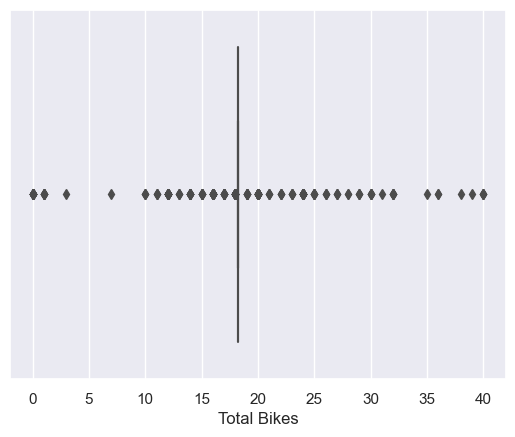

In [124]:
# Detecting Outliers in Total Bikes

sns.boxplot(x=merged_df_nw['Total Bikes'])


<Axes: xlabel='Rating'>

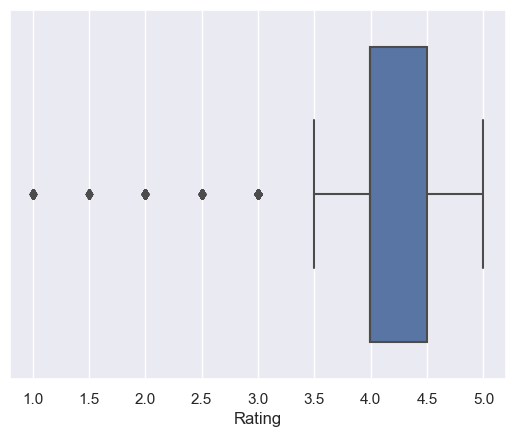

In [125]:
# Detecting Outliers in Rating
sns.boxplot(x=merged_df_nw['Rating'])

<Axes: xlabel='Distance'>

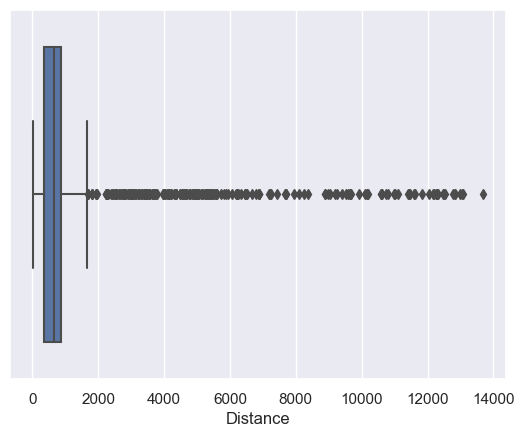

In [126]:
# Detecting Outliers in Distance
sns.boxplot(x=merged_df_nw['Distance'])

<Axes: xlabel='Review_count'>

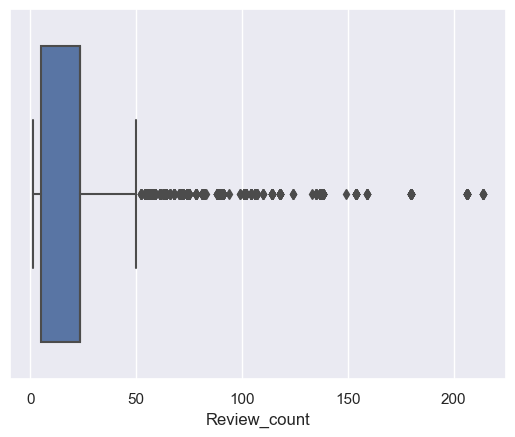

In [127]:
# Detecting Outliers in Review_count
sns.boxplot(x=merged_df_nw['Review_count'])

<Axes: xlabel='Latitude'>

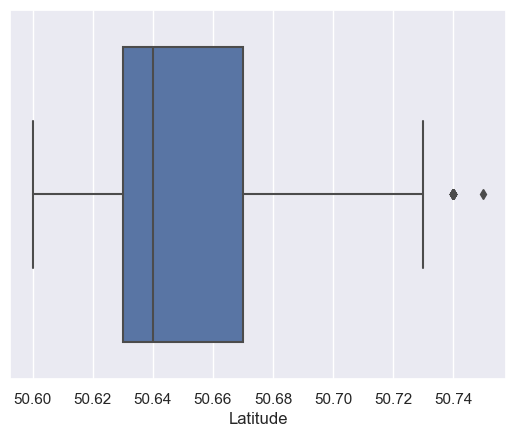

In [128]:
# Detecting Outliers in Latitude
sns.boxplot(x=merged_df_nw['Latitude'])

<Axes: xlabel='Longitude'>

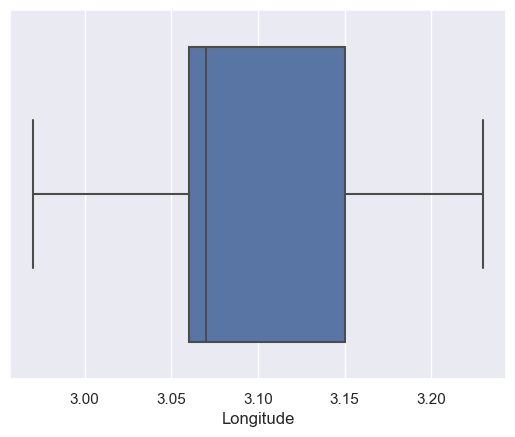

In [129]:
# Detecting Outliers in Longitude
sns.boxplot(x=merged_df_nw['Longitude'])

In [130]:
# calculate the interquartile range (IQR)
Q1 = merged_df_nw.quantile(0.25)
Q3 = merged_df_nw.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Distance        519.35
Latitude          0.04
Longitude         0.09
Rating            0.51
Review_count     18.53
Total Bikes       0.00
dtype: float64


Interpretation:

The result you've provided appears to be a summary of statistical measures for various columns in `merged_df_nw`, specifically focusing on the column 'Review_count.' Let's break down what each statistic means:

1. Distance: The "Distance" column in `merged_df_nw` has a median (50th percentile) value of 519.35. The median represents the middle value when the data is sorted, and it's a measure of central tendency. Half of the values in this column are below 519.35, and half are above.

2. Latitude: The "Latitude" column has a median value of 0.04. Similar to the "Distance" column, this represents the middle value of the latitude data.

3. Longitude: The "Longitude" column has a median value of 0.09, similar to the "Latitude" column. It represents the middle value of the longitude data.

4. Rating: The "Rating" column has a median value of 0.51. This suggests that the median rating in your dataset is 0.51.

5. Review_count: The "Review_count" column has a median value of 18.53. This means that the median number of reviews for the data points in this column is 18.53.

6. Total Bikes: The "Total Bikes" column has a median value of 0.00. This suggests that, for the data points in this column, the median total number of bikes is 0.00, which might be an unusual or problematic value.

In the context of detecting outliers, the boxplot you generated with Seaborn is a helpful visualization for identifying potential outliers in the "Review_count" column. Outliers are data points that significantly deviate from the majority of the data and can be detected visually as points outside the "whiskers" of the boxplot.

The "Review_count" column, in particular, has a relatively high spread of values, with a wide interquartile range (IQR) as indicated by the boxplot. The IQR represents the range between the 25th and 75th percentiles and is often used to identify potential outliers. Values that fall outside a certain range beyond the whiskers (typically 1.5 times the IQR) are considered potential outliers.



#### Removing Outliers

The code below is used for removing outliers from the DataFrame (`merged_df_nw`) using the Interquartile Range (IQR) method. 

Let's break down the code step by step:

1. Calculating Quartiles and IQR:
   - `Q1` represents the first quartile, which is the 25th percentile of the data.
   - `Q3` represents the third quartile, which is the 75th percentile of the data.
   - `IQR` represents the Interquartile Range, which is the range between the first quartile (Q1) and the third quartile (Q3). It is a measure of the spread of the middle 50% of the data.

2. Detecting Outliers:
   - `((merged_df_nw < (Q1 - 1.5 * IQR)) | (merged_df_nw > (Q3 + 1.5 * IQR)))` is a boolean condition that checks for outliers in each row of the DataFrame `merged_df_nw`. Specifically, it checks if any value in a row is less than `Q1 - 1.5 * IQR` or greater than `Q3 + 1.5 * IQR`.
   - The `~` symbol at the beginning negates this condition, meaning it selects rows that do not meet this outlier condition.

3. Removing Outliers:
   - `merged_df_nw[...]` filters the DataFrame based on the condition, keeping only the rows that do not contain outliers.

4. Calculating the New Shape:
   - `merged_df_nw.shape` calculates and returns the new shape (number of rows and columns) of the DataFrame after removing outliers.

In summary, the code below identifies and removes outliers from the DataFrame `merged_df_nw` by selecting rows where none of the values fall below `Q1 - 1.5 * IQR` or above `Q3 + 1.5 * IQR`. 

The resulting DataFrame `merged_df_nw` will contain data points that are not considered outliers based on this criterion.

In [131]:
outlier_df = merged_df_nw.copy()
outlier_df

,Station_names,Categories,Distance,Address,Latitude,Longitude,Rating,Review_count,Total Bikes
0,Others,Variety,748.79,Lille,50.64,3.08,3.99,23.53,20.00
1,Others,Variety,748.79,Lille,50.65,3.08,3.99,23.53,27.00
2,Others,Variety,748.79,Lille,50.63,3.13,3.99,23.53,0.00
3,Others,Variety,748.79,Lille,50.69,3.16,3.99,23.53,12.00
4,Others,Variety,748.79,Lille,50.61,3.06,3.99,23.53,16.00
...,...,...,...,...,...,...,...,...,...
8625,CHATELLENIE,Fast Food,459.21,"78 Rue Jeanne D'arc, Près de l'église de Flers...",50.63,3.13,3.50,4.00,18.19
8626,CHATELLENIE,"French, Venues & Event Spaces, Caterers",948.84,"99 rue Parmentier, 59650 Villeneuve d'Ascq, Fr...",50.64,3.14,2.00,8.00,18.19
8627,CHATELLENIE,Fast Food,934.77,"7 bd de Mons, 59650 Villeneuve-d'Ascq, France",50.64,3.14,3.50,3.00,18.19
8628,CHATELLENIE,Brasseries,1026.45,"41 rue de la Cousinerie, 59650 Villeneuve-d'As...",50.64,3.15,3.50,2.00,18.19


In [132]:
outlier_df = outlier_df[~((outlier_df < (Q1 - 1.5 * IQR)) |(outlier_df > (Q3 + 1.5 * IQR))).any(axis=1)]
outlier_df.shape

(6505, 9)

Explanation of (6505, 9):

The first number (6505) represents the number of rows in the filtered DataFrame.

The second number (9) represents the number of columns in the filtered DataFrame.

Meaning that ther around 2000 rows were outliers, i.e comparing the `merged_df_nw.count()`values (8593, 9) to the outcome of removing the outliers

In [135]:
# Another option for removing outliers
# Locating where the outliers are:

# Calculate the lower and upper bounds for each column
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# Identify outliers for each column
# outliers_distance = (outlier_df['Distance'] < lower_bound['Distance']) | (outlier_df['Distance'] > upper_bound['Distance'])
# outliers_latitude = (outlier_df['Latitude'] < lower_bound['Latitude']) | (outlier_df['Latitude'] > upper_bound['Latitude'])
# outliers_longitude = (outlier_df['Longitude'] < lower_bound['Longitude']) | (outlier_df['Longitude'] > upper_bound['Longitude'])
# outliers_rating = (outlier_df['Rating'] < lower_bound['Rating']) | (outlier_df['Rating'] > upper_bound['Rating'])
# outliers_total_bikes = (outlier_df['Total Bikes'] < lower_bound['Total Bikes']) | (outlier_df['Total Bikes'] > upper_bound['Total Bikes'])
# outliers_review_count = (outlier_df['Review_count'] < lower_bound['Review_count']) | (outlier_df['Review_count'] > upper_bound['Review_count'])

# Combine the outlier flags for all columns
# outliers = outliers_distance | outliers_latitude | outliers_longitude | outliers_rating | outliers_total_bikes | outliers_review_count

# Remove rows containing outliers
# outlier_df = outlier_df[~outliers]

# Check the shape of the DataFrame after removing outliers
# filtered_shape = outlier_df.shape


In [136]:
# print(outliers_distance)
# print('======================================')
# print(outliers_latitude)
# print('======================================')
# print(outliers_longitude)
# print('======================================')
# print(outliers_rating)
# print('======================================')
# print(outliers_total_bikes)
# print('======================================')
# print(outliers_review_count)

In [137]:
merged_df_nw = outlier_df
merged_df_nw

,Station_names,Categories,Distance,Address,Latitude,Longitude,Rating,Review_count,Total Bikes
289,PARVIS ROTTERDAM,"Restaurant, Garden, Hotel",594.00,rue du Ballon,50.64,3.07,3.99,23.53,18.19
290,PARVIS ROTTERDAM,"Café, Coffee Shop, Restaurant",817.00,151 rue de Paris,50.63,3.07,3.99,23.53,18.19
291,PARVIS ROTTERDAM,"Bar, Café, Sandwich Spot",933.00,16 bis place du Lion d'Or,50.64,3.07,3.99,23.53,18.19
292,PARVIS ROTTERDAM,"Bar, Brewery, French Restaurant",938.00,33 place du Théâtre,50.64,3.06,3.99,23.53,18.19
293,PARVIS ROTTERDAM,French Restaurant,796.00,72- 74 rue Pierre Mauroy,50.64,3.07,3.99,23.53,18.19
...,...,...,...,...,...,...,...,...,...
8623,CHATELLENIE,"Fast Food, Food Delivery Services",886.00,"214 Rue De La Convention, 59650 Villeneuve D A...",50.64,3.15,3.50,9.00,18.19
8625,CHATELLENIE,Fast Food,459.21,"78 Rue Jeanne D'arc, Près de l'église de Flers...",50.63,3.13,3.50,4.00,18.19
8627,CHATELLENIE,Fast Food,934.77,"7 bd de Mons, 59650 Villeneuve-d'Ascq, France",50.64,3.14,3.50,3.00,18.19
8628,CHATELLENIE,Brasseries,1026.45,"41 rue de la Cousinerie, 59650 Villeneuve-d'As...",50.64,3.15,3.50,2.00,18.19


In [138]:
data_cleaned = merged_df_nw
data_cleaned

,Station_names,Categories,Distance,Address,Latitude,Longitude,Rating,Review_count,Total Bikes
289,PARVIS ROTTERDAM,"Restaurant, Garden, Hotel",594.00,rue du Ballon,50.64,3.07,3.99,23.53,18.19
290,PARVIS ROTTERDAM,"Café, Coffee Shop, Restaurant",817.00,151 rue de Paris,50.63,3.07,3.99,23.53,18.19
291,PARVIS ROTTERDAM,"Bar, Café, Sandwich Spot",933.00,16 bis place du Lion d'Or,50.64,3.07,3.99,23.53,18.19
292,PARVIS ROTTERDAM,"Bar, Brewery, French Restaurant",938.00,33 place du Théâtre,50.64,3.06,3.99,23.53,18.19
293,PARVIS ROTTERDAM,French Restaurant,796.00,72- 74 rue Pierre Mauroy,50.64,3.07,3.99,23.53,18.19
...,...,...,...,...,...,...,...,...,...
8623,CHATELLENIE,"Fast Food, Food Delivery Services",886.00,"214 Rue De La Convention, 59650 Villeneuve D A...",50.64,3.15,3.50,9.00,18.19
8625,CHATELLENIE,Fast Food,459.21,"78 Rue Jeanne D'arc, Près de l'église de Flers...",50.63,3.13,3.50,4.00,18.19
8627,CHATELLENIE,Fast Food,934.77,"7 bd de Mons, 59650 Villeneuve-d'Ascq, France",50.64,3.14,3.50,3.00,18.19
8628,CHATELLENIE,Brasseries,1026.45,"41 rue de la Cousinerie, 59650 Villeneuve-d'As...",50.64,3.15,3.50,2.00,18.19


In [139]:
del outlier_df

In [140]:
# Save dataframe for the purpose of visualization

# saving a copy of the cleaned dataframe
data_cleaned.to_csv(r'C:\Code\Project_Stat_Model_DataFrame_Store\data_vis_df.csv', index=False) 


#### VISUALIZATION
Plot different features against one another (scatter), against frequency (histogram)

In [147]:
merged_df_nw.to_csv(r'C:\Code\Project_Stat_Model_DataFrame_Store\merged_df.csv', index=False)
visual_df = pd.read_csv(r'C:\Code\Project_Stat_Model_DataFrame_Store\merged_df.csv')
visual_df

,Station_names,Categories,Distance,Address,Latitude,Longitude,Rating,Review_count,Total Bikes
0,PARVIS ROTTERDAM,"Restaurant, Garden, Hotel",594.00,rue du Ballon,50.64,3.07,3.99,23.53,18.19
1,PARVIS ROTTERDAM,"Café, Coffee Shop, Restaurant",817.00,151 rue de Paris,50.63,3.07,3.99,23.53,18.19
2,PARVIS ROTTERDAM,"Bar, Café, Sandwich Spot",933.00,16 bis place du Lion d'Or,50.64,3.07,3.99,23.53,18.19
3,PARVIS ROTTERDAM,"Bar, Brewery, French Restaurant",938.00,33 place du Théâtre,50.64,3.06,3.99,23.53,18.19
4,PARVIS ROTTERDAM,French Restaurant,796.00,72- 74 rue Pierre Mauroy,50.64,3.07,3.99,23.53,18.19
...,...,...,...,...,...,...,...,...,...
6500,CHATELLENIE,"Fast Food, Food Delivery Services",886.00,"214 Rue De La Convention, 59650 Villeneuve D A...",50.64,3.15,3.50,9.00,18.19
6501,CHATELLENIE,Fast Food,459.21,"78 Rue Jeanne D'arc, Près de l'église de Flers...",50.63,3.13,3.50,4.00,18.19
6502,CHATELLENIE,Fast Food,934.77,"7 bd de Mons, 59650 Villeneuve-d'Ascq, France",50.64,3.14,3.50,3.00,18.19
6503,CHATELLENIE,Brasseries,1026.45,"41 rue de la Cousinerie, 59650 Villeneuve-d'As...",50.64,3.15,3.50,2.00,18.19


In [169]:
# Using `merged_df` to perform EDA
merged_df

,Station Name,Latitude,Longitude,Total Bikes,ll,Foursquare ID,Categories,Distance,Address,Country,Locality,Station_names,Yelp ID,City,Name,Rating,Review_count,Price
0,PARVIS ROTTERDAM,50.637709,3.077478,20.0,"50.637709,3.077478",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ROMARIN,50.645430,3.075116,27.0,"50.64543,3.075116",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,RUE CHAMBORD,50.629720,3.133873,0.0,"50.62972,3.133873",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MAIRIE DE QUARTIER OUEST,50.687500,3.158559,12.0,"50.6875,3.1585592",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,FAUBOURG D'ARRAS,50.614052,3.062195,16.0,"50.614052,3.062195",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8625,NaN,50.633360,3.130640,NaN,NaN,NaN,Fast Food,459.205587,"78 Rue Jeanne D'arc, Près de l'église de Flers...",NaN,NaN,CHATELLENIE,ezBXp5qFmepOamS3--S0Jw,Villeneuve D'Ascq,Trinacria 1,3.5,4.0,€€
8626,NaN,50.644569,3.135700,NaN,NaN,NaN,"French, Venues & Event Spaces, Caterers",948.841469,"99 rue Parmentier, 59650 Villeneuve d'Ascq, Fr...",NaN,NaN,CHATELLENIE,T3thRU7OY69eya_yL9K3PA,Villeneuve d'Ascq,Brasserie 99,2.0,8.0,€
8627,NaN,50.642958,3.143075,NaN,NaN,NaN,Fast Food,934.767441,"7 bd de Mons, 59650 Villeneuve-d'Ascq, France",NaN,NaN,CHATELLENIE,D89OzFnjcAyesIT9ToSLZQ,Villeneuve-d'Ascq,Quick,3.5,3.0,€€
8628,NaN,50.642820,3.145670,NaN,NaN,NaN,Brasseries,1026.445785,"41 rue de la Cousinerie, 59650 Villeneuve-d'As...",NaN,NaN,CHATELLENIE,0AtSxYZ0jmWFbnAIbGbSQw,Villeneuve-d'Ascq,L'Office,3.5,2.0,€€


In [167]:
merged_df.corr()

,Latitude,Longitude,Total Bikes,Distance,Rating,Review_count
Latitude,1.000000,0.721418,-0.200069,-0.052085,-0.064860,-0.243322
Longitude,0.721418,1.000000,-0.294087,-0.029072,-0.165446,-0.325552
Total Bikes,-0.200069,-0.294087,1.000000,NaN,NaN,NaN
Distance,-0.052085,-0.029072,NaN,1.000000,0.135332,-0.029244
Rating,-0.064860,-0.165446,NaN,0.135332,1.000000,0.068745
Review_count,-0.243322,-0.325552,NaN,-0.029244,0.068745,1.000000


In [170]:
merged_df.shape

(8630, 18)

In [171]:
# Create a new dataframe with relevant columns
merged_dfx = merged_df[['Station_names', 'Categories', 'Distance', 'Address', 'Latitude', 'Longitude', 'Rating', 'Review_count', 'Price', 'Total Bikes']]

merged_dfx

,Station_names,Categories,Distance,Address,Latitude,Longitude,Rating,Review_count,Price,Total Bikes
0,NaN,NaN,NaN,NaN,50.637709,3.077478,NaN,NaN,NaN,20.0
1,NaN,NaN,NaN,NaN,50.645430,3.075116,NaN,NaN,NaN,27.0
2,NaN,NaN,NaN,NaN,50.629720,3.133873,NaN,NaN,NaN,0.0
3,NaN,NaN,NaN,NaN,50.687500,3.158559,NaN,NaN,NaN,12.0
4,NaN,NaN,NaN,NaN,50.614052,3.062195,NaN,NaN,NaN,16.0
...,...,...,...,...,...,...,...,...,...,...
8625,CHATELLENIE,Fast Food,459.205587,"78 Rue Jeanne D'arc, Près de l'église de Flers...",50.633360,3.130640,3.5,4.0,€€,NaN
8626,CHATELLENIE,"French, Venues & Event Spaces, Caterers",948.841469,"99 rue Parmentier, 59650 Villeneuve d'Ascq, Fr...",50.644569,3.135700,2.0,8.0,€,NaN
8627,CHATELLENIE,Fast Food,934.767441,"7 bd de Mons, 59650 Villeneuve-d'Ascq, France",50.642958,3.143075,3.5,3.0,€€,NaN
8628,CHATELLENIE,Brasseries,1026.445785,"41 rue de la Cousinerie, 59650 Villeneuve-d'As...",50.642820,3.145670,3.5,2.0,€€,NaN


In [172]:
merged_dfx.shape

(8630, 10)

In [173]:
print("\nMissing Values:")
print(merged_dfx.isnull().sum())   # Before dropping the values


Missing Values:
Station_names     289
Categories        289
Distance          289
Address           294
Latitude            0
Longitude           0
Rating           3179
Review_count     3179
Price            4284
Total Bikes      8341
dtype: int64


In [175]:
# Assuming you have merged_dfx defined already

# Round 'Distance, Latitude, and Longitude' to 2 decimal places using .loc
merged_dfx.loc[:, 'Distance'] = merged_dfx['Distance'].round(2)
merged_dfx.loc[:, 'Latitude'] = merged_dfx['Latitude'].round(2)
merged_dfx.loc[:, 'Longitude'] = merged_dfx['Longitude'].round(2)
merged_dfx

merged_dfx.dtypes

Station_names     object
Categories        object
Distance         float64
Address           object
Latitude         float64
Longitude        float64
Rating           float64
Review_count     float64
Price             object
Total Bikes      float64
dtype: object

In [176]:
# Dropping a column
merged_dfx.drop(['Price'], axis=1, inplace=True)
merged_dfx

,Station_names,Categories,Distance,Address,Latitude,Longitude,Rating,Review_count,Total Bikes
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0
...,...,...,...,...,...,...,...,...,...
8625,CHATELLENIE,Fast Food,459.21,"78 Rue Jeanne D'arc, Près de l'église de Flers...",50.63,3.13,3.5,4.0,NaN
8626,CHATELLENIE,"French, Venues & Event Spaces, Caterers",NaN,"99 rue Parmentier, 59650 Villeneuve d'Ascq, Fr...",NaN,NaN,2.0,8.0,NaN
8627,CHATELLENIE,Fast Food,934.77,"7 bd de Mons, 59650 Villeneuve-d'Ascq, France",50.64,3.14,3.5,3.0,NaN
8628,CHATELLENIE,Brasseries,1026.45,"41 rue de la Cousinerie, 59650 Villeneuve-d'As...",50.64,3.15,3.5,2.0,NaN


In [177]:
merged_dfx.mean()

Distance        604.113073
Latitude         50.651331
Longitude         3.098209
Rating            3.993212
Review_count     23.525592
Total Bikes      18.190311
dtype: float64

In [178]:
# Fill missing values in 'Rating' with the mean of 'Rating'
mean_rating = merged_dfx['Rating'].mean()
merged_dfx['Rating'].fillna(mean_rating, inplace=True)
merged_dfx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8630 entries, 0 to 8629
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Station_names  8341 non-null   object 
 1   Categories     8341 non-null   object 
 2   Distance       6505 non-null   float64
 3   Address        8336 non-null   object 
 4   Latitude       6505 non-null   float64
 5   Longitude      6505 non-null   float64
 6   Rating         8630 non-null   float64
 7   Review_count   5451 non-null   float64
 8   Total Bikes    289 non-null    float64
dtypes: float64(6), object(3)
memory usage: 674.2+ KB


In [179]:
# Fill missing values in 'Review_count' with the mean of 'Review_count'
mean_review_count = merged_dfx['Review_count'].mean()
merged_dfx['Review_count'].fillna(mean_review_count, inplace=True)
merged_dfx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8630 entries, 0 to 8629
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Station_names  8341 non-null   object 
 1   Categories     8341 non-null   object 
 2   Distance       6505 non-null   float64
 3   Address        8336 non-null   object 
 4   Latitude       6505 non-null   float64
 5   Longitude      6505 non-null   float64
 6   Rating         8630 non-null   float64
 7   Review_count   8630 non-null   float64
 8   Total Bikes    289 non-null    float64
dtypes: float64(6), object(3)
memory usage: 674.2+ KB


In [180]:
# Fill missing values in 'Total Bikes' with the mean of 'Total Bikes'
mean_total_bikes = merged_dfx['Total Bikes'].mean()
merged_dfx['Total Bikes'].fillna(mean_total_bikes, inplace=True)
merged_dfx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8630 entries, 0 to 8629
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Station_names  8341 non-null   object 
 1   Categories     8341 non-null   object 
 2   Distance       6505 non-null   float64
 3   Address        8336 non-null   object 
 4   Latitude       6505 non-null   float64
 5   Longitude      6505 non-null   float64
 6   Rating         8630 non-null   float64
 7   Review_count   8630 non-null   float64
 8   Total Bikes    8630 non-null   float64
dtypes: float64(6), object(3)
memory usage: 674.2+ KB


In [181]:
# Fill missing values in 'Distance' with the mean of 'Diatance'
mean_distance = merged_dfx['Distance'].mean()
merged_dfx['Distance'].fillna(mean_distance, inplace=True)
merged_dfx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8630 entries, 0 to 8629
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Station_names  8341 non-null   object 
 1   Categories     8341 non-null   object 
 2   Distance       8630 non-null   float64
 3   Address        8336 non-null   object 
 4   Latitude       6505 non-null   float64
 5   Longitude      6505 non-null   float64
 6   Rating         8630 non-null   float64
 7   Review_count   8630 non-null   float64
 8   Total Bikes    8630 non-null   float64
dtypes: float64(6), object(3)
memory usage: 674.2+ KB


In [182]:
# Checking for missing or null values.

print("\nMissing Values:")
print(merged_dfx.isnull().sum())   # Before dropping the values


Missing Values:
Station_names     289
Categories        289
Distance            0
Address           294
Latitude         2125
Longitude        2125
Rating              0
Review_count        0
Total Bikes         0
dtype: int64


In [183]:
# Fill missing values in 'Categories' with 'Misc'
merged_dfx['Categories'].fillna('Misc', inplace=True)
merged_dfx.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8630 entries, 0 to 8629
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Station_names  8341 non-null   object 
 1   Categories     8630 non-null   object 
 2   Distance       8630 non-null   float64
 3   Address        8336 non-null   object 
 4   Latitude       6505 non-null   float64
 5   Longitude      6505 non-null   float64
 6   Rating         8630 non-null   float64
 7   Review_count   8630 non-null   float64
 8   Total Bikes    8630 non-null   float64
dtypes: float64(6), object(3)
memory usage: 674.2+ KB


In [184]:
# Fill missing values in 'Station_names' with 'Others'
merged_dfx['Station_names'].fillna('Others', inplace=True)
merged_dfx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8630 entries, 0 to 8629
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Station_names  8630 non-null   object 
 1   Categories     8630 non-null   object 
 2   Distance       8630 non-null   float64
 3   Address        8336 non-null   object 
 4   Latitude       6505 non-null   float64
 5   Longitude      6505 non-null   float64
 6   Rating         8630 non-null   float64
 7   Review_count   8630 non-null   float64
 8   Total Bikes    8630 non-null   float64
dtypes: float64(6), object(3)
memory usage: 674.2+ KB


In [185]:
# Fill missing values in 'Address' with 'Lille'
merged_dfx['Address'].fillna('Lille', inplace=True)
merged_dfx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8630 entries, 0 to 8629
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Station_names  8630 non-null   object 
 1   Categories     8630 non-null   object 
 2   Distance       8630 non-null   float64
 3   Address        8630 non-null   object 
 4   Latitude       6505 non-null   float64
 5   Longitude      6505 non-null   float64
 6   Rating         8630 non-null   float64
 7   Review_count   8630 non-null   float64
 8   Total Bikes    8630 non-null   float64
dtypes: float64(6), object(3)
memory usage: 674.2+ KB


In [186]:
# Fill missing values in 'Latitude' with the mean of 'Latitude'
mean_latitude = merged_dfx['Latitude'].mean()
merged_dfx['Latitude'].fillna(mean_latitude, inplace=True)
merged_dfx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8630 entries, 0 to 8629
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Station_names  8630 non-null   object 
 1   Categories     8630 non-null   object 
 2   Distance       8630 non-null   float64
 3   Address        8630 non-null   object 
 4   Latitude       8630 non-null   float64
 5   Longitude      6505 non-null   float64
 6   Rating         8630 non-null   float64
 7   Review_count   8630 non-null   float64
 8   Total Bikes    8630 non-null   float64
dtypes: float64(6), object(3)
memory usage: 674.2+ KB


In [191]:
# Fill missing values in 'Longitude' with the mean of 'Latitude'
mean_longitude = merged_dfx['Longitude'].mean()
merged_dfx['Longitude'].fillna(mean_longitude, inplace=True)
merged_dfx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8630 entries, 0 to 8629
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Station_names  8630 non-null   object 
 1   Categories     8630 non-null   object 
 2   Distance       8630 non-null   float64
 3   Address        8630 non-null   object 
 4   Latitude       8630 non-null   float64
 5   Longitude      8630 non-null   float64
 6   Rating         8630 non-null   float64
 7   Review_count   8630 non-null   float64
 8   Total Bikes    8630 non-null   float64
dtypes: float64(6), object(3)
memory usage: 674.2+ KB


In [192]:
print("\nMissing Values:")
print(merged_df_nw.isnull().sum())   # Before dropping the values


Missing Values:
Station_names    0
Categories       0
Distance         0
Address          0
Latitude         0
Longitude        0
Rating           0
Review_count     0
Total Bikes      0
dtype: int64


In [193]:
# Save dataframe for the purpose of validation in sqlite

# saving a copy of the combined dataframe
merged_dfx.to_csv(r'C:\Code\Project_Stat_Model_DataFrame_Store\combz_df.csv')

In [194]:
merged_dfx.corr()

,Distance,Latitude,Longitude,Rating,Review_count,Total Bikes
Distance,1.000000e+00,-7.212793e-02,-3.835411e-02,3.711109e-02,-4.396048e-02,-5.433738e-16
Latitude,-7.212793e-02,1.000000e+00,7.233014e-01,-5.919838e-03,-5.273368e-02,-2.839240e-16
Longitude,-3.835411e-02,7.233014e-01,1.000000e+00,-3.774806e-02,-6.501491e-02,-1.634836e-16
Rating,3.711109e-02,-5.919838e-03,-3.774806e-02,1.000000e+00,6.874499e-02,1.244309e-17
Review_count,-4.396048e-02,-5.273368e-02,-6.501491e-02,6.874499e-02,1.000000e+00,-5.762556e-17
Total Bikes,-5.433738e-16,-2.839240e-16,-1.634836e-16,1.244309e-17,-5.762556e-17,1.000000e+00


In [200]:
merged_dfx

,Station_names,Categories,Distance,Address,Latitude,Longitude,Rating,Review_count,Total Bikes
0,Others,Misc,604.113073,Lille,50.651331,3.098209,3.993212,23.525592,20.000000
1,Others,Misc,604.113073,Lille,50.651331,3.098209,3.993212,23.525592,27.000000
2,Others,Misc,604.113073,Lille,50.651331,3.098209,3.993212,23.525592,0.000000
3,Others,Misc,604.113073,Lille,50.651331,3.098209,3.993212,23.525592,12.000000
4,Others,Misc,604.113073,Lille,50.651331,3.098209,3.993212,23.525592,16.000000
...,...,...,...,...,...,...,...,...,...
8625,CHATELLENIE,Fast Food,459.210000,"78 Rue Jeanne D'arc, Près de l'église de Flers...",50.630000,3.130000,3.500000,4.000000,18.190311
8626,CHATELLENIE,"French, Venues & Event Spaces, Caterers",604.113073,"99 rue Parmentier, 59650 Villeneuve d'Ascq, Fr...",50.651331,3.098209,2.000000,8.000000,18.190311
8627,CHATELLENIE,Fast Food,934.770000,"7 bd de Mons, 59650 Villeneuve-d'Ascq, France",50.640000,3.140000,3.500000,3.000000,18.190311
8628,CHATELLENIE,Brasseries,1026.450000,"41 rue de la Cousinerie, 59650 Villeneuve-d'As...",50.640000,3.150000,3.500000,2.000000,18.190311


In [201]:
# Round 'Distance, Latitude, Longitude, Rating, Review_count and Total Bikes' to 2 decimal places using .loc
merged_dfx.loc[:, 'Distance'] = merged_dfx['Distance'].round(2)
merged_dfx.loc[:, 'Latitude'] = merged_dfx['Latitude'].round(2)
merged_dfx.loc[:, 'Longitude'] = merged_dfx['Longitude'].round(2)
merged_dfx.loc[:, 'Rating'] = merged_dfx['Rating'].round(2)
merged_dfx.loc[:, 'Review_count'] = merged_dfx['Review_count'].round(2)
merged_dfx.loc[:, 'Total Bikes'] = merged_dfx['Total Bikes'].round(2)
merged_dfx

,Station_names,Categories,Distance,Address,Latitude,Longitude,Rating,Review_count,Total Bikes
0,Others,Misc,604.11,Lille,50.65,3.10,3.99,23.53,20.00
1,Others,Misc,604.11,Lille,50.65,3.10,3.99,23.53,27.00
2,Others,Misc,604.11,Lille,50.65,3.10,3.99,23.53,0.00
3,Others,Misc,604.11,Lille,50.65,3.10,3.99,23.53,12.00
4,Others,Misc,604.11,Lille,50.65,3.10,3.99,23.53,16.00
...,...,...,...,...,...,...,...,...,...
8625,CHATELLENIE,Fast Food,459.21,"78 Rue Jeanne D'arc, Près de l'église de Flers...",50.63,3.13,3.50,4.00,18.19
8626,CHATELLENIE,"French, Venues & Event Spaces, Caterers",604.11,"99 rue Parmentier, 59650 Villeneuve d'Ascq, Fr...",50.65,3.10,2.00,8.00,18.19
8627,CHATELLENIE,Fast Food,934.77,"7 bd de Mons, 59650 Villeneuve-d'Ascq, France",50.64,3.14,3.50,3.00,18.19
8628,CHATELLENIE,Brasseries,1026.45,"41 rue de la Cousinerie, 59650 Villeneuve-d'As...",50.64,3.15,3.50,2.00,18.19


In [226]:
# Save dataframe for the purpose of validation in sqlite

# saving a copy of the combined dataframe
merged_dfx.to_csv(r'C:\Code\Project_Stat_Model_DataFrame_Store\combz_df.csv', index=False)

##### Bar

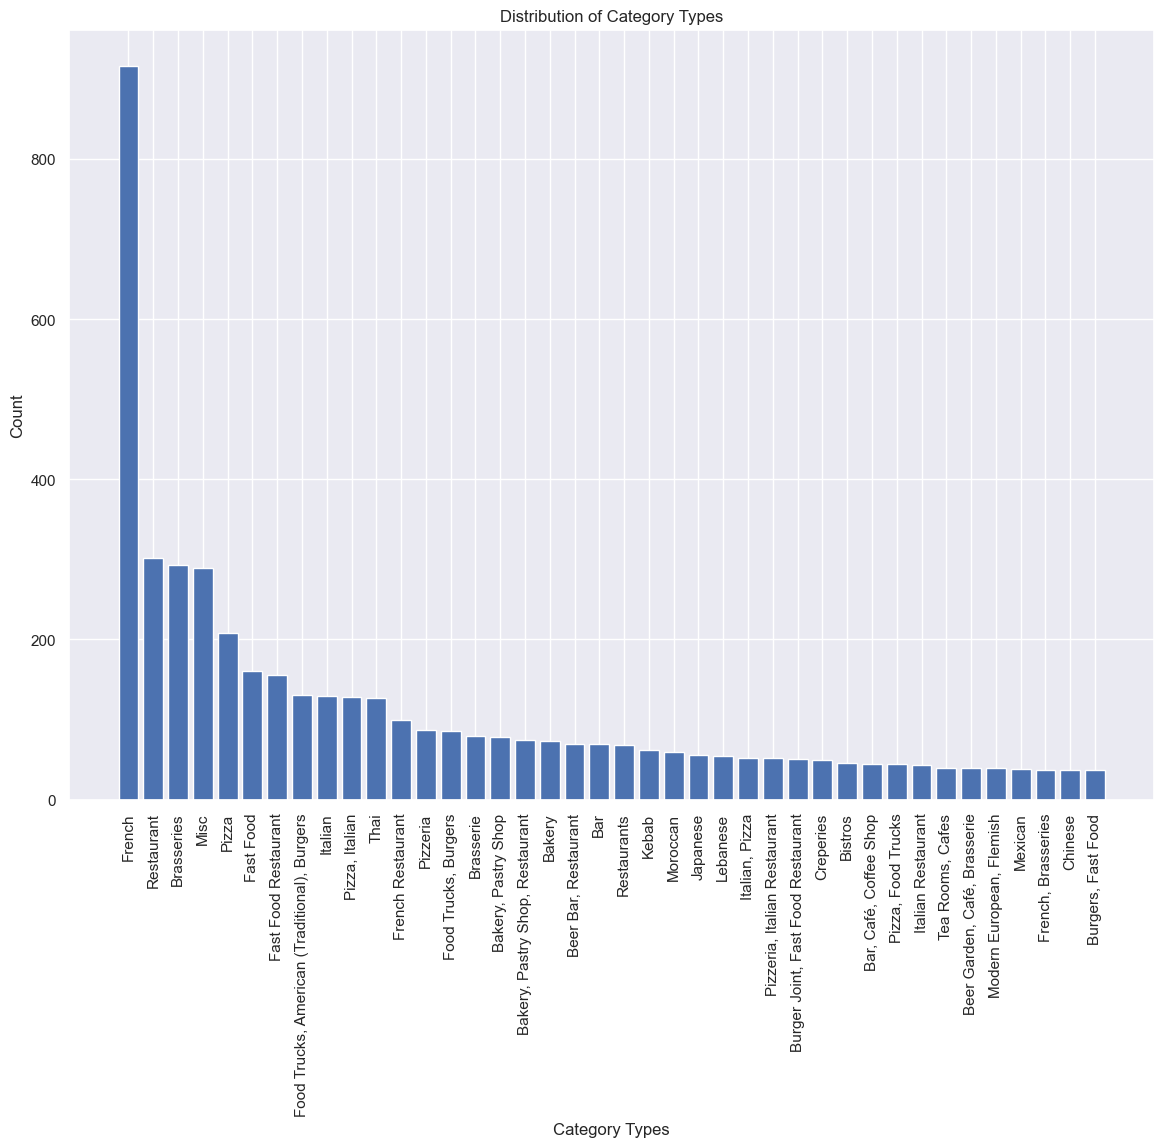

In [203]:
import matplotlib.pyplot as plt

# Count the occurrences of each establishment type
type_counts = merged_dfx['Categories'].value_counts().nlargest(40)

# Create a bar chart
plt.figure(figsize=(14, 10))
plt.bar(type_counts.index, type_counts.values)
plt.xlabel('Category Types')
plt.ylabel('Count')
plt.title('Distribution of Category Types')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


The resulting bar chart provides a visual representation of the distribution of different establishment types (categories). Showing which categories are the most common or frequent based on their counts. This information is helpful for understanding the composition of the dataframe and to identify patterns or trends related to different types of establishments.

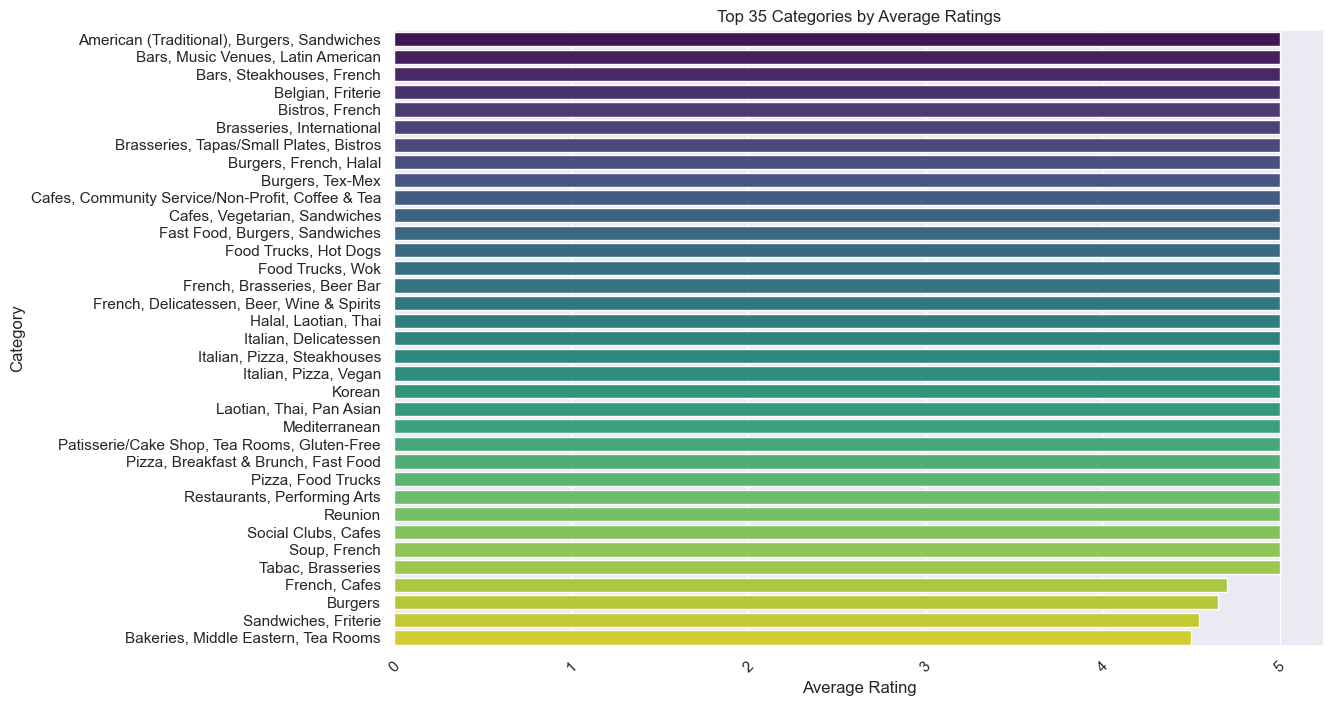

In [204]:
import matplotlib.pyplot as plt
import seaborn as sns


# Calculate the average ratings by category
avg_ratings_by_category = merged_dfx.groupby('Categories')['Rating'].mean().reset_index()

# Get the top 35 categories with the highest average ratings
top_n_categories = avg_ratings_by_category.nlargest(35, 'Rating')  

# Create a bar chart for the top 35 categories
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
sns.barplot(x='Rating', y='Categories', data=top_n_categories, palette='viridis')
plt.title('Top {} Categories by Average Ratings'.format(35))
plt.xlabel('Average Rating')
plt.ylabel('Category')
plt.xticks(rotation=45)
plt.show()



The bar chart displays the top 35 categories with the highest average ratings, this helps to identify which categories have the best average ratings. This can be useful for understanding which types of establishments or businesses tend to receive higher ratings of the dataset and can be used for various analytical and decision-making purposes.

##### Histogram

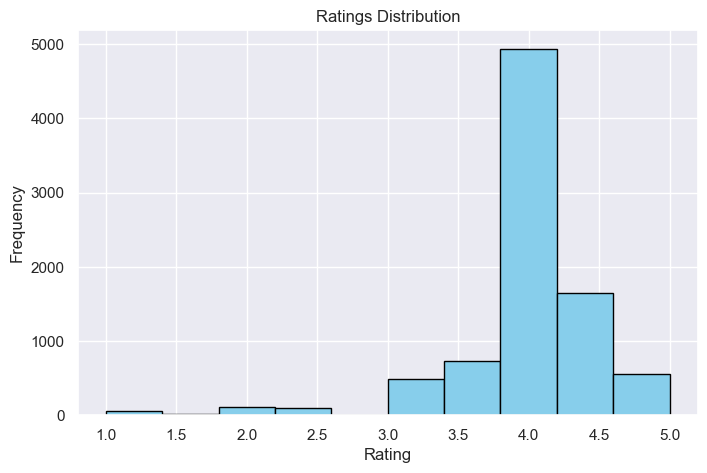

In [205]:
import matplotlib.pyplot as plt

# Create a histogram of ratings
plt.figure(figsize=(8, 5))
plt.hist(merged_dfx['Rating'], bins=10, color='skyblue', edgecolor='black')
plt.title('Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

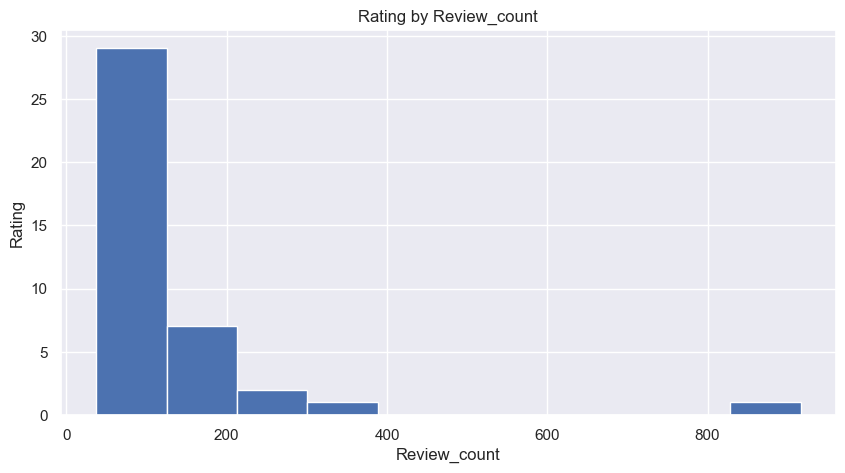

In [206]:
merged_dfx.Categories.value_counts().nlargest(40).plot(kind='hist', figsize=(10,5))
plt.title("Rating by Review_count")
plt.ylabel('Rating')
plt.xlabel('Review_count');


In [207]:
merged_dfx.corr()

,Distance,Latitude,Longitude,Rating,Review_count,Total Bikes
Distance,1.000000e+00,-7.211246e-02,-3.834871e-02,3.742570e-02,-4.397116e-02,-6.040000e-11
Latitude,-7.211246e-02,1.000000e+00,7.226949e-01,2.173662e-03,-6.125991e-02,-2.547729e-07
Longitude,-3.834871e-02,7.226949e-01,1.000000e+00,-4.429002e-02,-5.801611e-02,2.086449e-07
Rating,3.742570e-02,2.173662e-03,-4.429002e-02,1.000000e+00,6.874454e-02,-2.490957e-08
Review_count,-4.397116e-02,-6.125991e-02,-5.801611e-02,6.874454e-02,1.000000e+00,6.891124e-10
Total Bikes,-6.040000e-11,-2.547729e-07,2.086449e-07,-2.490957e-08,6.891124e-10,1.000000e+00


##### Heat Maps

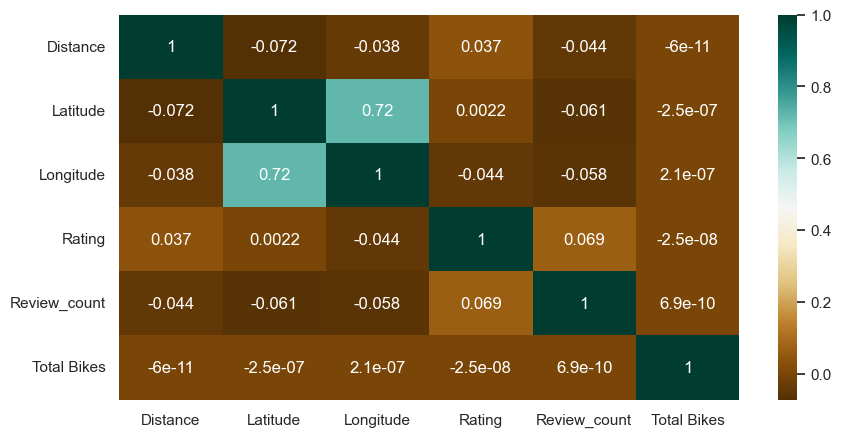

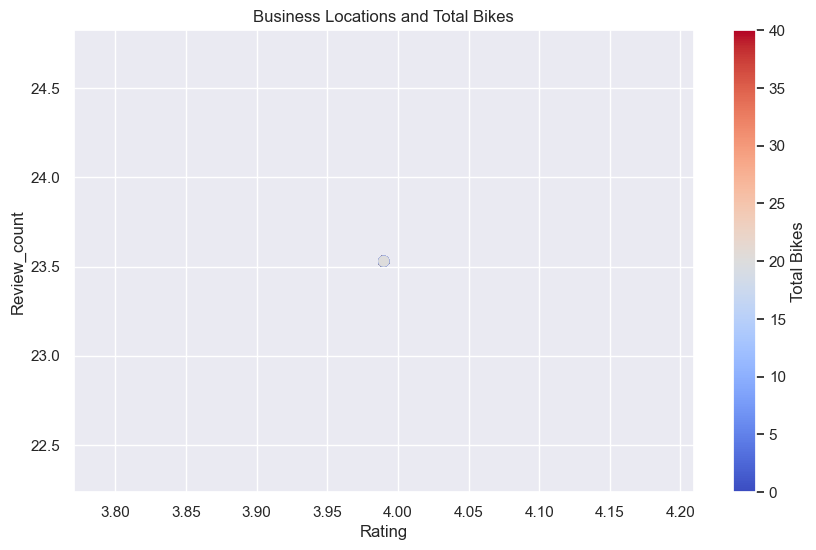

In [208]:
plt.figure(figsize=(10,5))
c= merged_dfx.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

import matplotlib.pyplot as plt

# Create a scatter plot for latitude and longitude
plt.figure(figsize=(10, 6))
plt.scatter(merged_dfx['Rating'], merged_dfx['Review_count'], c=merged_df['Total Bikes'], cmap='coolwarm', s=50)
plt.title('Business Locations and Total Bikes')
plt.xlabel('Rating')
plt.ylabel('Review_count')
plt.colorbar(label='Total Bikes')
plt.show()

##### Scatterplot

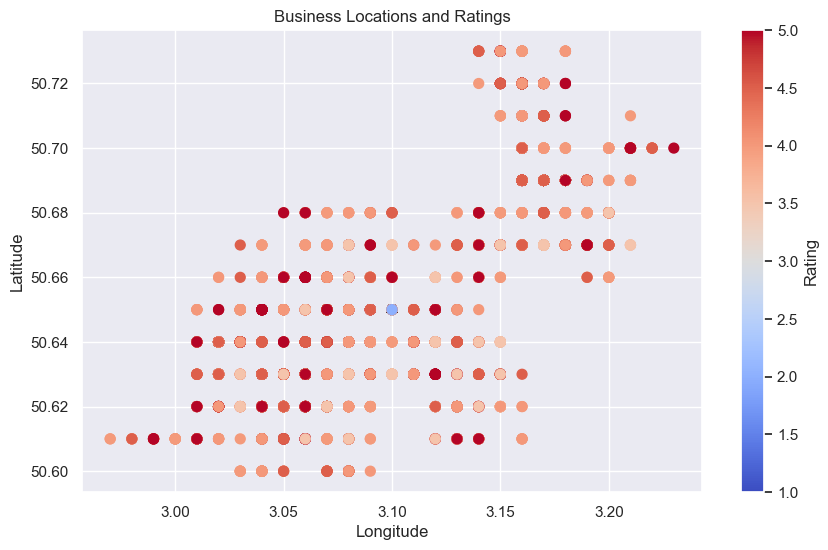

In [210]:
import matplotlib.pyplot as plt

# Create a scatter plot for latitude and longitude
plt.figure(figsize=(10, 6))
plt.scatter(merged_dfx['Longitude'], merged_dfx['Latitude'], c=merged_dfx['Rating'], cmap='coolwarm', s=50)
plt.title('Business Locations and Ratings')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Rating')
plt.show()

In [211]:
import pandas as pd
import statsmodels.api as sm
import seaborn
seaborn.set()

y = merged_dfx['Total Bikes']
x1 = merged_dfx[['Latitude', 'Longitude', 'Rating', 'Review_count']]

x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()

In [212]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Total Bikes   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                 8.362e-10
Date:                Thu, 28 Sep 2023   Prob (F-statistic):               1.00
Time:                        04:40:44   Log-Likelihood:                -15620.
No. Observations:                8630   AIC:                         3.125e+04
Df Residuals:                    8625   BIC:                         3.129e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           18.1922     40.942      0.444      0.657     -62.063      98.448
Latitude     -4.524e-05      0.830  -5.45e-05      1.000      -1.628       1.628
Longitude     2.667e-05      0.506   5.27e-05      1.000      -0.992       0.992
Rating         3.53e-08      0.028   1.27e-06      1.000      -0.055       0.055
Review_count -2.368e-10      0.001  -4.22e-07      1.000      -0.001       0.001
==============================================================================
Omnibus:                     3576.156   Durbin-Watson:                   1.540
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5013793.172
Skew:                          -0.233   Prob(JB):                         0.00
Kurtosis:                     121.081   Cond. No.                     1.48e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""


Explain the initial pattern or relationship you discoved through this visualization.

### DATABASE

##### CREATE SQLITE DATABASE
Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [213]:
# Import required library
import sqlite3
import pandas as pd

In [214]:
#import sqlite3
# connection = sqlite3.connect('combined_df.sqlite')

# Connect to the SQLite database, hence database is created (it will be created if it doesn't exist)
db_path = r'C:\Code\Project_Stat_Model_DataFrame_Store\Project_CB.db'
conn = sqlite3.connect(db_path)

In [215]:
# Establishing a connection with the created database

conn = sqlite3.connect('Project_CB.db')


##### Data Storage

In [216]:
# read stored CityBike csv file
cb_df = pd.read_csv(r'C:\Code\Project_Stat_Model_DataFrame_Store\cb1_df.csv')
# cb_df = pd.read_csv(r'C:\Code\Project_Stat_Model_DataFrame_Store\city_bike_df.csv')
cb_df.head()

,Station Name,Latitude,Longitude,Total Bikes,ll
0,PARVIS ROTTERDAM,50.637709,3.077478,20,"50.637709,3.077478"
1,ROMARIN,50.645430,3.075116,27,"50.64543,3.075116"
2,RUE CHAMBORD,50.629720,3.133873,0,"50.62972,3.133873"
3,MAIRIE DE QUARTIER OUEST,50.687500,3.158559,12,"50.6875,3.1585592"
4,FAUBOURG D'ARRAS,50.614052,3.062195,16,"50.614052,3.062195"


In [217]:
cb_df.shape

(289, 5)

In [218]:
# Store citybikes dataframe in the database
# df.to_sql('my_table', conn, index=False, if_exists='replace')

cb_df.to_sql('cb_df_data', conn, if_exists='replace', index=False)

289

In [219]:
# read stored foursquare csv file

fsq_df = pd.read_csv(r'C:\Code\Project_Stat_Model_DataFrame_Store\fsq2_df.csv')
fsq_df.head()

,Foursquare ID,Categories,Distance,Store Latitude,Store Longitude,Address,Country,Locality,Station_names
0,4c2c75f457a9c9b64c6af767,"Restaurant, Garden, Hotel",594,50.643400,3.074834,rue du Ballon,FR,Lille,PARVIS ROTTERDAM
1,52580520498e7287e120ec20,"Café, Coffee Shop, Restaurant",817,50.633326,3.068203,151 rue de Paris,FR,Lille,PARVIS ROTTERDAM
2,5aec3daabed483002cddc5f1,"Bar, Café, Sandwich Spot",933,50.640054,3.065019,16 bis place du Lion d'Or,FR,Lille,PARVIS ROTTERDAM
3,4bf3de1bcad2c9286f359b99,"Bar, Brewery, French Restaurant",938,50.637617,3.063970,33 place du Théâtre,FR,Lille,PARVIS ROTTERDAM
4,54bfa53d498eab9b0dc63806,French Restaurant,796,50.636692,3.065591,72- 74 rue Pierre Mauroy,FR,Lille,PARVIS ROTTERDAM


In [220]:
fsq_df.shape

(2890, 9)

In [221]:
# Store foursquare dataframe in the database
# df.to_sql('my_table', conn, index=False, if_exists='replace')

fsq_df.to_sql('fsq_df_data', conn, if_exists='replace', index=False)

2890

In [222]:
# read stored Yelp csv file

yelp_df = pd.read_csv(r'C:\Code\Project_Stat_Model_DataFrame_Store\yelp1.1_df.csv')
yelp_df.head()

,Yelp ID,Categories,Distance,Latitude,Longitude,Address,City,Name,Rating,Review_count,Price,Station_names
0,rLOYRsuqZTd6ESYkG1dEmg,French,136.078044,50.636488,3.077348,"Hôtel Casino Barrière de Lille, 777 bis pont d...",Lille,La Terrasse du Parc,4.0,16,€€€,CHATELLENIE
1,ULt6A2p3HVGKBktjSvUENA,"Coffee & Tea, Breakfast & Brunch",816.651871,50.633335,3.068176,"151 rue de Paris, 59800 Lille, France",Lille,Coffee Makers,4.5,137,€€,CHATELLENIE
2,HkBF2Uamk_QnqdOkDi4P5w,French,115.089029,50.636683,3.077263,"Hôtel Casino Barrière de Lille, 777 bis pont d...",Lille,Les Hauts de Lille,4.0,12,€€€€,CHATELLENIE
3,8wp3JtP0iZkgrMmpmKtdqQ,"Steakhouses, Barbeque",628.168916,50.635500,3.069280,"13 rue Sainte-Anne, 59800 Lille, France",Lille,Grill Sainte-Anne,4.5,37,€€€,CHATELLENIE
4,Yg0jsBdq8DynRkDlmksADQ,Greek,937.097725,50.642810,3.066900,"86 rue de Gand, 59000 Lille, France",Lille,L'Ile de Crète,4.5,59,€€€,CHATELLENIE


In [223]:
yelp_df.shape

(5451, 12)

In [224]:
# Store Yelp dataframe in the database
# df.to_sql('my_table', conn, index=False, if_exists='replace')

yelp_df.to_sql('yelp_df_data', conn, if_exists='replace', index=False)

5451

In [227]:
# read stored Combined csv file

combined_df = pd.read_csv(r'C:\Code\Project_Stat_Model_DataFrame_Store\combz_df.csv')

combined_df.head()

,Station_names,Categories,Distance,Address,Latitude,Longitude,Rating,Review_count,Total Bikes
0,Others,Misc,604.11,Lille,50.65,3.1,3.99,23.53,20.0
1,Others,Misc,604.11,Lille,50.65,3.1,3.99,23.53,27.0
2,Others,Misc,604.11,Lille,50.65,3.1,3.99,23.53,0.0
3,Others,Misc,604.11,Lille,50.65,3.1,3.99,23.53,12.0
4,Others,Misc,604.11,Lille,50.65,3.1,3.99,23.53,16.0


In [228]:
combined_df.shape

(8630, 9)

In [229]:
# Check the column names in the DataFrame
print(combined_df.columns)


Index(['Station_names', 'Categories', 'Distance', 'Address', 'Latitude',
       'Longitude', 'Rating', 'Review_count', 'Total Bikes'],
      dtype='object')


In [231]:
# combined_dfx  = combined_df[['Yelp ID', 'Categories', 'Distance', 'Latitude', 'Longitude', 'Address', 'Foursquare ID', 'City', 'Name', 'Rating', 'll', 'Country', 'Station Name', 
 #                              'Total Bikes']]

# combined_dfx

In [232]:
# Store combined dataframe in the database
# df.to_sql('my_table', conn, index=False, if_exists='replace')

combined_df.to_sql('combined_dfx_data', conn, if_exists='replace', index=False)

8630

In [233]:
# Close database connection

conn.close()

In [234]:
combined_df

,Station_names,Categories,Distance,Address,Latitude,Longitude,Rating,Review_count,Total Bikes
0,Others,Misc,604.11,Lille,50.65,3.10,3.99,23.53,20.00
1,Others,Misc,604.11,Lille,50.65,3.10,3.99,23.53,27.00
2,Others,Misc,604.11,Lille,50.65,3.10,3.99,23.53,0.00
3,Others,Misc,604.11,Lille,50.65,3.10,3.99,23.53,12.00
4,Others,Misc,604.11,Lille,50.65,3.10,3.99,23.53,16.00
...,...,...,...,...,...,...,...,...,...
8625,CHATELLENIE,Fast Food,459.21,"78 Rue Jeanne D'arc, Près de l'église de Flers...",50.63,3.13,3.50,4.00,18.19
8626,CHATELLENIE,"French, Venues & Event Spaces, Caterers",604.11,"99 rue Parmentier, 59650 Villeneuve d'Ascq, Fr...",50.65,3.10,2.00,8.00,18.19
8627,CHATELLENIE,Fast Food,934.77,"7 bd de Mons, 59650 Villeneuve-d'Ascq, France",50.64,3.14,3.50,3.00,18.19
8628,CHATELLENIE,Brasseries,1026.45,"41 rue de la Cousinerie, 59650 Villeneuve-d'As...",50.64,3.15,3.50,2.00,18.19


In [235]:
# Save a copy
combined_df.to_csv(r'C:\Code\Project_Stat_Model_DataFrame_Store\combsql1.0_df.csv', index=False)


In [236]:
# read stored csv file

comb_df = pd.read_csv(r'C:\Code\Project_Stat_Model_DataFrame_Store\combsql1.0_df.csv')
comb_df.head()

,Station_names,Categories,Distance,Address,Latitude,Longitude,Rating,Review_count,Total Bikes
0,Others,Misc,604.11,Lille,50.65,3.1,3.99,23.53,20.0
1,Others,Misc,604.11,Lille,50.65,3.1,3.99,23.53,27.0
2,Others,Misc,604.11,Lille,50.65,3.1,3.99,23.53,0.0
3,Others,Misc,604.11,Lille,50.65,3.1,3.99,23.53,12.0
4,Others,Misc,604.11,Lille,50.65,3.1,3.99,23.53,16.0


In [237]:
comb_df.shape

(8630, 9)

In [238]:
comb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8630 entries, 0 to 8629
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Station_names  8630 non-null   object 
 1   Categories     8630 non-null   object 
 2   Distance       8630 non-null   float64
 3   Address        8630 non-null   object 
 4   Latitude       8630 non-null   float64
 5   Longitude      8630 non-null   float64
 6   Rating         8630 non-null   float64
 7   Review_count   8630 non-null   float64
 8   Total Bikes    8630 non-null   float64
dtypes: float64(6), object(3)
memory usage: 606.9+ KB


##### VALIDATE DATABASE
Look at the data before and after the join to validate your data.

In [239]:
# Import libraries

import sqlite3
import pandas as pd

# Connect to database
db_path = r'C:\Code\Project_Stat_Model_DataFrame_Store\Project_CB.db'
conn = sqlite3.connect(db_path)  

In [240]:
# Establishing a connection with the created database

conn = sqlite3.connect('Project_CB.db')

In [241]:
# Retrieve the data from the database using a SQL query
query = "SELECT * FROM yelp_df_data LIMIT 5"  
dfylp_from_db = pd.read_sql_query(query, conn)

print(dfylp_from_db)

                  Yelp ID                        Categories    Distance  \
0  rLOYRsuqZTd6ESYkG1dEmg                            French  136.078044   
1  ULt6A2p3HVGKBktjSvUENA  Coffee & Tea, Breakfast & Brunch  816.651871   
2  HkBF2Uamk_QnqdOkDi4P5w                            French  115.089029   
3  8wp3JtP0iZkgrMmpmKtdqQ             Steakhouses, Barbeque  628.168916   
4  Yg0jsBdq8DynRkDlmksADQ                             Greek  937.097725   

    Latitude  Longitude                                            Address  \
0  50.636488   3.077348  Hôtel Casino Barrière de Lille, 777 bis pont d...   
1  50.633335   3.068176              151 rue de Paris, 59800 Lille, France   
2  50.636683   3.077263  Hôtel Casino Barrière de Lille, 777 bis pont d...   
3  50.635500   3.069280            13 rue Sainte-Anne, 59800 Lille, France   
4  50.642810   3.066900                86 rue de Gand, 59000 Lille, France   

    City                 Name  Rating  Review_count Price Station_names  
0  Lil

In [242]:
# Retrieve the data from the database using a SQL query
query = "SELECT * FROM fsq_df_data LIMIT 5"  
dfsq_from_db = pd.read_sql_query(query, conn)

print(dfsq_from_db)

              Foursquare ID                       Categories  Distance  \
0  4c2c75f457a9c9b64c6af767        Restaurant, Garden, Hotel       594   
1  52580520498e7287e120ec20    Café, Coffee Shop, Restaurant       817   
2  5aec3daabed483002cddc5f1         Bar, Café, Sandwich Spot       933   
3  4bf3de1bcad2c9286f359b99  Bar, Brewery, French Restaurant       938   
4  54bfa53d498eab9b0dc63806                French Restaurant       796   

   Store Latitude  Store Longitude                    Address Country  \
0       50.643400         3.074834              rue du Ballon      FR   
1       50.633326         3.068203           151 rue de Paris      FR   
2       50.640054         3.065019  16 bis place du Lion d'Or      FR   
3       50.637617         3.063970        33 place du Théâtre      FR   
4       50.636692         3.065591   72- 74 rue Pierre Mauroy      FR   

  Locality     Station_names  
0    Lille  PARVIS ROTTERDAM  
1    Lille  PARVIS ROTTERDAM  
2    Lille  PARVIS ROTT

In [243]:
# Retrieve the data from the database using a SQL query
query = "SELECT * FROM combined_dfx_data LIMIT 5"  
cmbdfx_from_db = pd.read_sql_query(query, conn)

print(cmbdfx_from_db)

  Station_names Categories  Distance Address  Latitude  Longitude  Rating  \
0        Others       Misc    604.11   Lille     50.65        3.1    3.99   
1        Others       Misc    604.11   Lille     50.65        3.1    3.99   
2        Others       Misc    604.11   Lille     50.65        3.1    3.99   
3        Others       Misc    604.11   Lille     50.65        3.1    3.99   
4        Others       Misc    604.11   Lille     50.65        3.1    3.99   

   Review_count  Total Bikes  
0         23.53         20.0  
1         23.53         27.0  
2         23.53          0.0  
3         23.53         12.0  
4         23.53         16.0  


In [244]:
# Close connection
conn.close()


In [245]:
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect('Project_CB.db')
cursor = conn.cursor()

# 1. Schema Validation
# Define your expected schema and compare it to the database schema

# 2. Data Type Validation
# Check that data types match your expectations

# 3. Unique Constraint Validation
cursor.execute("SELECT COUNT(*) FROM yelp_df_data GROUP BY 'Yelp ID' HAVING COUNT(*) > 1;")
duplicates = cursor.fetchall()
if duplicates:
    print("Duplicate values found in unique columns:", duplicates)

# 4. Foreign Key Constraint Validation
# Ensure that foreign key relationships are maintained

# 5. Custom Data Validation Rules
# Write custom SQL queries to check for specific rules

# 6. Referential Integrity
# Verify that all references between tables are valid

# Close the database connection
conn.close()


Duplicate values found in unique columns: [(5451,)]
